In [1]:
import torch

num_gpus = torch.cuda.device_count()
if num_gpus > 0:
    print(f"There is {num_gpus} GPU in the system")
else:
    print("No GPU in the system")

/eos/user/q/qsha/work/miniconda3/envs/quirk-gpu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


There is 1 GPU in the system


In [9]:
######## R & Hit_id modulewise_true_edge compare #######

import torch
import csv
import os
import numpy as np
from bokeh.io import output_notebook, show, export_png
from bokeh.plotting import figure, row
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.palettes import viridis
from bokeh.models.annotations import Label
output_notebook()

event_id = 1914

# 加载数据
#file_path_1 = f"./datasets/Lambda500_pre_selection_mix_hit/feature_store/QuirkTracking_sample/{event_id}"
file_path_1 = f"./datasets/Lambda500_pre_selection_quirk_0930/feature_store/QuirkTracking_sample/{event_id}"
file_path_2 = f"./datasets/Lambda500_pre_selection_quirk/feature_store/QuirkTracking_sample/{event_id}"

# Check if both files exist
if os.path.exists(file_path_1) and os.path.exists(file_path_2):
    sample_data_1 = torch.load(file_path_1, map_location="cpu")
    sample_data_2 = torch.load(file_path_2, map_location="cpu")
else:
    raise FileNotFoundError(f"File not found")

num_tracks = 100

# Create the first plot
p1 = figure(title='Truth graph ("R" processing)', x_axis_label='x', y_axis_label='y', height=400, width=400)
r, phi, z = sample_data_1.cpu().x.T
true_edges = sample_data_1.modulewise_true_edges
true_unique, true_lengths = sample_data_1.pid[true_edges[0]].unique(return_counts=True)
pid = sample_data_1.pid
x = r * np.cos(phi)
y = r * np.sin(phi)
cmap = viridis(num_tracks)
source = ColumnDataSource(dict(x=x.numpy(), y=y.numpy()))
p1.circle(x='x', y='y', source=source, color=cmap[0], size=1, alpha=0.1)
for i, track in enumerate(true_unique[true_lengths >= 5][:num_tracks]):
    track_true_edges = true_edges[:, pid[true_edges[0]] == track]
    X_edges, Y_edges = x[track_true_edges].numpy(), y[track_true_edges].numpy()
    X = np.concatenate(X_edges)
    Y = np.concatenate(Y_edges)
    p1.circle(X, Y, color=cmap[i], size=5)
    p1.multi_line(X_edges.T.tolist(), Y_edges.T.tolist(), color=cmap[i])

# Create the second plot
p2 = figure(title='Truth graph ("Hit_id" processing)', x_axis_label='x', y_axis_label='y', height=400, width=400)
r, phi, z = sample_data_2.cpu().x.T
true_edges = sample_data_2.modulewise_true_edges
true_unique, true_lengths = sample_data_2.pid[true_edges[0]].unique(return_counts=True)
pid = sample_data_2.pid
x = r * np.cos(phi)
y = r * np.sin(phi)
cmap = viridis(num_tracks)
source = ColumnDataSource(dict(x=x.numpy(), y=y.numpy()))
p2.circle(x='x', y='y', source=source, color=cmap[0], size=1, alpha=0.1)
for i, track in enumerate(true_unique[true_lengths >= 5][:num_tracks]):
    track_true_edges = true_edges[:, pid[true_edges[0]] == track]
    X_edges, Y_edges = x[track_true_edges].numpy(), y[track_true_edges].numpy()
    X = np.concatenate(X_edges)
    Y = np.concatenate(Y_edges)
    p2.circle(X, Y, color=cmap[i], size=5)
    p2.multi_line(X_edges.T.tolist(), Y_edges.T.tolist(), color=cmap[i])

# Combine both plots into one layout
combined_layout = gridplot([[p1, p2]])

# Show the combined layout
show(combined_layout)

# Export the combined layout as PNG
#export_png(combined_layout, filename=f"./plot/try/{event_id}_combined.png")

Loading BokehJS ...

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
import os

output_directory = './plot/quirk_compare_event_id_0930'
os.makedirs(output_directory, exist_ok=True)

def plot_individual_trajectories(df, event_number, df_reconstruct):
    grouped_data = df.groupby('particle_id')
    grouped_reco = df_reconstruct.groupby('particle_id')
    
    # 获取原始数据中的所有不同的particle_id
    particle_ids = df['particle_id'].unique()

    for particle_id in particle_ids:
        fig = plt.figure(figsize=(12, 6))

        # 添加两个子图，一个用于原始数据，一个用于reconstruct_data
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')

        # 绘制原始数据的轨迹
        if particle_id in grouped_data.groups:
            group = grouped_data.get_group(particle_id)
            x = group['x']
            y = group['y']
            z = group['z']
            ax1.plot(x, y, z, marker='o', linestyle='-', label=f'Particle {particle_id}')
            ax1.set_xlabel('Hit X')
            ax1.set_ylabel('Hit Y')
            ax1.set_zlabel('Hit Z')
            ax1.set_title(f'Raw Trajectory Plot for Event {event_number}, Particle {particle_id}')
            ax1.legend()

        # 绘制reconstruct_data的轨迹
        if particle_id in grouped_reco.groups:
            group_reco = grouped_reco.get_group(particle_id)
            x_recon = group_reco['x']
            y_recon = group_reco['y']
            z_recon = group_reco['z']
            ax2.plot(x_recon, y_recon, z_recon, marker='o', linestyle='-', label=f'Particle {particle_id}')
            ax2.set_xlabel('Hit X')
            ax2.set_ylabel('Hit Y')
            ax2.set_zlabel('Hit Z')
            ax2.set_title(f'.pyg Trajectory Plot for Event {event_number}, Particle {particle_id}')
            ax2.legend()

        output_file_path = os.path.join(output_directory, f'E{event_number}_Pid{particle_id}.png')
        plt.savefig(output_file_path)
        
        plt.show()
        
        
df_quirk = pd.read_csv('./1.csv')
reconstruct_data = df_quirk.drop_duplicates(subset=['particle_id'])
event_file_array = reconstruct_data['event_id'].to_numpy()[:40]
# 循环处理每个 event_number
for event_number in event_file_array:
    file_hit_name = f"../QuirkTracking/datasets/Lambda500_pre_selection_quirk/Quirk/event00000{event_number}-hits.csv"
    df = pd.read_csv(file_hit_name)
    df['r'] = (df['r']) / 51.4
    df['x'] = (df['r']) * np.cos(df['phi'])
    df['y'] = (df['r']) * np.sin(df['phi'])
    df['z'] = df['z'] / 100.

    # 获取reconstruct_data的数据
    df_reconstruct = df_quirk[df_quirk['event_id'] == event_number]

    # 为每个particle_id创建原始轨迹和重建轨迹的子图
    plot_individual_trajectories(df, event_number, df_reconstruct)

In [1]:
######## pre cut test ########

import pandas as pd

# 循环遍历event_number
for event_number in range(1000, 1002):
    file_hit_name = f"../QuirkTracking/datasets/Lambda500_quirk_test/Quirk/event00000{event_number}-hits.csv"
    file_particle_name = f"../QuirkTracking/datasets/Lambda500_quirk_test/Quirk/event00000{event_number}-particles.csv"

    # 检查文件是否存在，如果不存在就跳过
    try:
        hits_df = pd.read_csv(file_hit_name)
        particles_df = pd.read_csv(file_particle_name)
    except FileNotFoundError:
        continue

    # 计算每个particle_id的行数
    n_hits = hits_df.groupby('particle_id').size().reset_index(name='n_hits')

    # 将n_hits合并到particles_df中
    particles_df = pd.merge(particles_df, n_hits, on='particle_id', how='left')

    # 将合并后的数据保存回文件
    particles_df.to_csv(file_particle_name, index=False)

In [1]:
######## Cut ##############


import pandas as pd
import numpy as np
import math
import os

# Loop through event numbers
for event_number in range(1000, 10000):
    file_hit_name = f"../QuirkTracking/datasets/Lambda500_dataset/try_quirk_sample/event00000{event_number}-hits.csv"
    file_particle_name = f"../QuirkTracking/datasets/Lambda500_dataset/try_quirk_sample/event00000{event_number}-particles.csv"

    # Check if files exist; if not, skip this event
    try:
        hits_df = pd.read_csv(file_hit_name)
        particles_df = pd.read_csv(file_particle_name)
    except FileNotFoundError:
        continue

    # Calculate the number of hits for each particle_id
    n_hits = hits_df.groupby('particle_id').size().reset_index(name='n_hits')

    # Merge n_hits into particles_df
    particles_df = pd.merge(particles_df, n_hits, on='particle_id', how='left')

    # Read particle data from the file
    dfp = pd.read_csv(file_particle_name)

    # Calculate angle between the first two particles in radians and degrees
    particle1 = dfp.iloc[0][['px', 'py', 'pz']]
    particle2 = dfp.iloc[1][['px', 'py', 'pz']]
    
    magnitude1 = np.linalg.norm(particle1)
    magnitude2 = np.linalg.norm(particle2)

    cosine_theta = np.dot(particle1, particle2) / (magnitude1 * magnitude2)
    angle_radians = math.acos(cosine_theta)
    angle_degrees = math.degrees(angle_radians)

    # Store angle values in particles_df
    particles_df['angle_radians'] = angle_radians
    particles_df['angle_degrees'] = angle_degrees

    # Save the merged data back to the file
    particles_df.to_csv(file_particle_name, index=False)
    
    if n_hits['n_hits'].max() < 50 and angle_degrees < 180:
        # Define the new directory structure
        new_directory = "../QuirkTracking/datasets/Lambda500_quirk/Quirk/"
        
        # Create the new directory if it doesn't exist
        os.makedirs(new_directory, exist_ok=True)
        
        # Define the new file paths
        new_hit_file = os.path.join(new_directory, f"event00000{event_number}-hits.csv")
        new_particle_file = os.path.join(new_directory, f"event00000{event_number}-particles.csv")
        
        # Save the files with the new directory structure
        hits_df.to_csv(new_hit_file, index=False)
        particles_df.to_csv(new_particle_file, index=False)


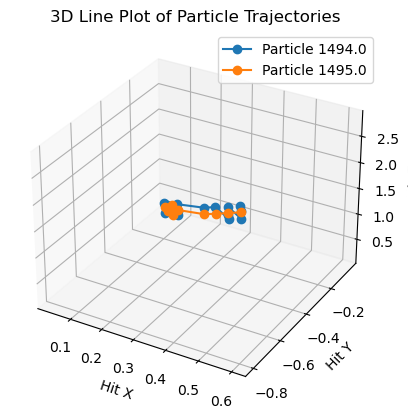

The angle bewtween two particles: 50.12594027276477
The angle bewtween two particles: 0.8748626984177698


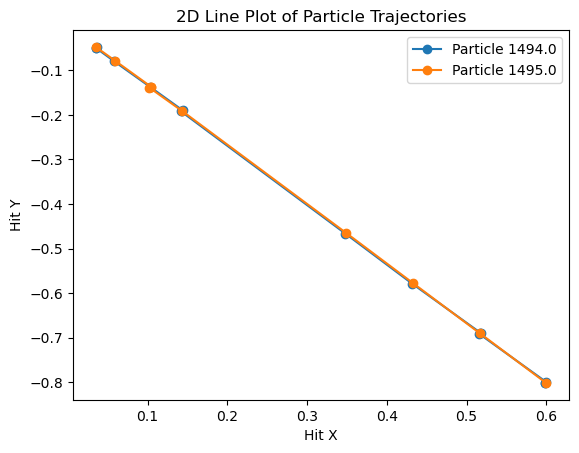

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

event_number = '1000'
file_hit_name = f"../QuirkTracking/datasets/Lambda500_quirk_test/Quirk/event00000{event_number}-hits.csv"
file_particle_name = f"../QuirkTracking/datasets/Lambda500_quirk_test/Quirk/event00000{event_number}-particles.csv"

df = pd.read_csv(file_hit_name)
df['r'] = (df['r']) / 51.4
df['x'] = (df['r']) * np.cos(df['phi'])
df['y'] = (df['r']) * np.sin(df['phi'])
df['z'] = df['z'] / 100.

#
df.to_csv('test1.csv', index=False)

grouped_data = df.groupby('particle_id')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for particle_id, group in grouped_data:
    x = group['x']
    y = group['y']
    z = group['z']
    ax.plot(x, y, z, marker='o', linestyle='-', label=f'Particle {particle_id}')

ax.set_xlabel('Hit X')
ax.set_ylabel('Hit Y')
ax.set_zlabel('Hit Z')

ax.set_title('3D Line Plot of Particle Trajectories')

ax.legend()
plt.show()


dfp = pd.read_csv(file_particle_name)

particle1 = dfp.iloc[0][['px', 'py', 'pz']]

particle2 = dfp.iloc[1][['px', 'py', 'pz']]

magnitude1 = np.linalg.norm(particle1)
magnitude2 = np.linalg.norm(particle2)

cosine_theta = np.dot(particle1, particle2) / (magnitude1 * magnitude2)
angle_radians = math.acos(cosine_theta)

angle_degrees = math.degrees(angle_radians)


print(f"The angle bewtween two particles: {angle_degrees}")
print(f"The angle bewtween two particles: {angle_radians}")


for particle_id, group in grouped_data:
    x = group['x']
    y = group['y']
    plt.plot(x, y, marker='o', linestyle='-', label=f'Particle {particle_id}')

plt.xlabel('Hit X')
plt.ylabel('Hit Y')

plt.title('2D Line Plot of Particle Trajectories')

plt.legend()

plt.show()

In [1]:
import os
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, row
from bokeh.models import ColumnDataSource
from bokeh.palettes import viridis
from bokeh.models.annotations import Label
output_notebook()

def get_training_metrics(log_dir_path):
    # 构建日志文件路径
    log_file = os.path.join(log_dir_path, 'metrics.csv')

    # 从CSV文件中读取指标数据
    metrics = pd.read_csv(log_file, sep=',')

    # 从训练指标中选择'epoch'和'train_loss'列
    train_metrics = metrics[~metrics['train_loss'].isna()][['epoch', 'train_loss']]

    # 将'train_metrics'中的'epoch'减1，可能是为了与其他指标对齐
    train_metrics['epoch'] -= 1

    # 从验证指标中选择'val_loss'、'eff'、'pur'、'current_lr'和'epoch'列
    val_metrics = metrics[~metrics['val_loss'].isna()][['val_loss', 'eff', 'pur', 'current_lr', 'epoch']]

    # 合并训练和验证指标，使用'epoch'列作为连接键
    metrics = pd.merge(left=train_metrics, right=val_metrics, how='inner', on='epoch')

    return metrics

def plot_training_metrics(metrics):

    p1 = figure(title='Training validation loss', x_axis_label='Epoch', y_axis_label='Loss', y_axis_type="log")

    source = ColumnDataSource(metrics)

    cmap = viridis(3)

    for idx, y in enumerate(['train_loss', 'val_loss']):
        p1.circle(y=y, x='epoch', source=source, color=cmap[idx], legend_label=y)
        p1.line(x='epoch', y=y, source=source, color=cmap[idx], legend_label=y)


    p2 = figure(title='Purity on validation set', x_axis_label='Epoch', y_axis_label='Purity')
    p2.circle(y='pur', x='epoch', source=source, color=cmap[0], legend_label='Purity')
    p2.line(x='epoch', y='pur', source=source, color=cmap[0], legend_label='Purity')

    p3 = figure(title='Efficiency on validation set', x_axis_label='Epoch', y_axis_label='Efficiency')
    p3.circle(y='eff', x='epoch', source=source, color=cmap[0], legend_label='Efficiency')
    p3.line(x='epoch', y='eff', source=source, color=cmap[0], legend_label='Efficiency')

    show(row([p1,p2, p3]))
   

log_dir_path_gnn_mix_hit = "./artifacts/Lambda500_pre_selection_mix_hit/gnn/quirk/version_0"
log_dir_path_gnn_quirk = "./artifacts/Lambda500_quirk/gnn/quirk/version_0"
#log_dir_path_gnn_quirk = "./artifacts/Lambda500_pre_selection_quirk/gnn/quirk/version_0"
gnn_metrics_mix_hit = get_training_metrics(log_dir_path_gnn_mix_hit)
gnn_metrics_quirk = get_training_metrics(log_dir_path_gnn_quirk)
#print(gnn_metrics)
plot_training_metrics(gnn_metrics_mix_hit)
plot_training_metrics(gnn_metrics_quirk)


Loading BokehJS ...

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

df_quirk = pd.read_csv('./output/track_mix_bkg_sel_2000_1800.csv')

output_directory = './plot/quirk_mix_sel_2000_1800/bkg/bkg_parameters'
os.makedirs(output_directory, exist_ok=True)

for column_name in df_quirk.columns:
    column_data = df_quirk[column_name]
    
    plt.hist(column_data, bins=100, color='blue', edgecolor='black')
    #plt.xlim(0, 20)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    
    plt.grid(True)
    
    output_file_path = os.path.join(output_directory, f'{column_name}_histogram.png')
    
    plt.savefig(output_file_path)
    
    plt.clf()

plt.show()

<Figure size 640x480 with 0 Axes>

/tmp/qsha/ipykernel_2015662/3579678562.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(12, 6))


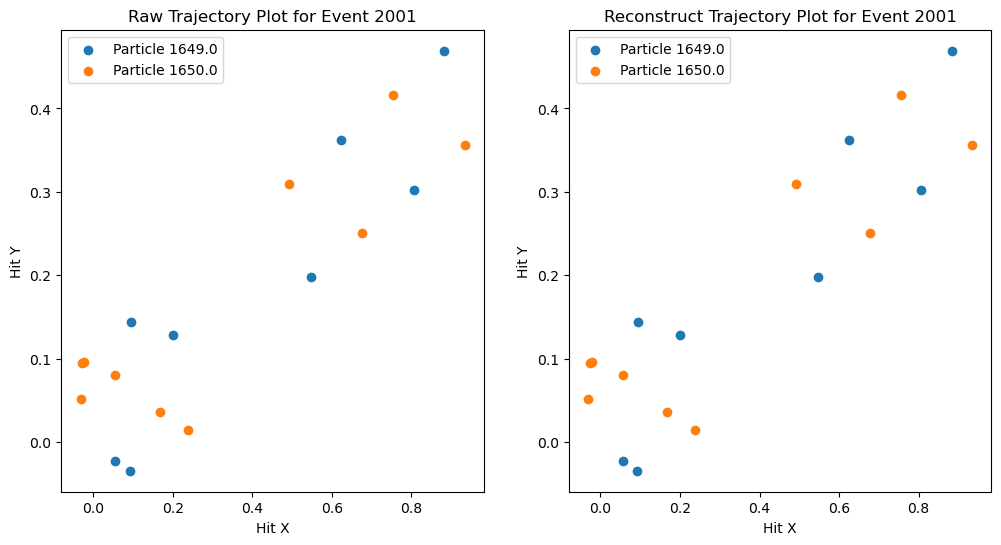

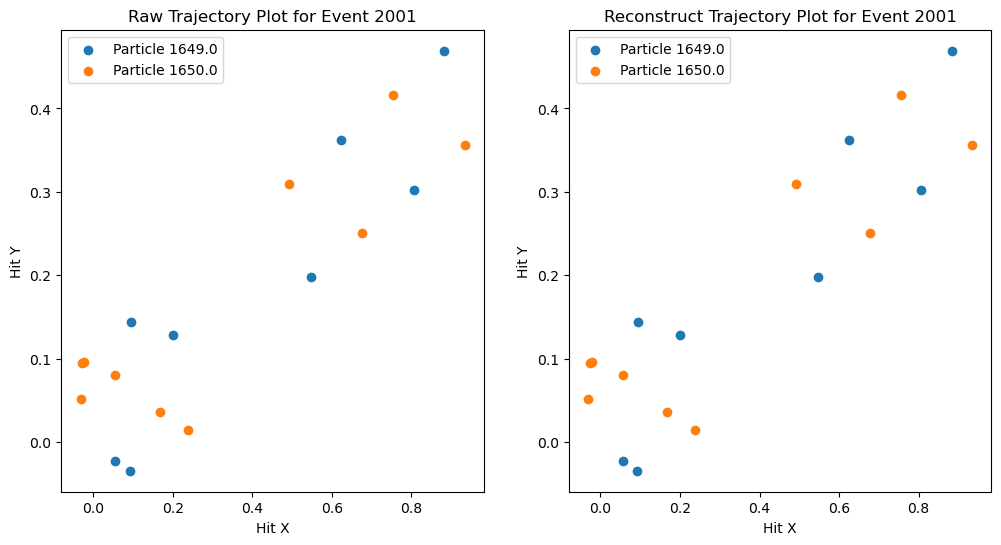

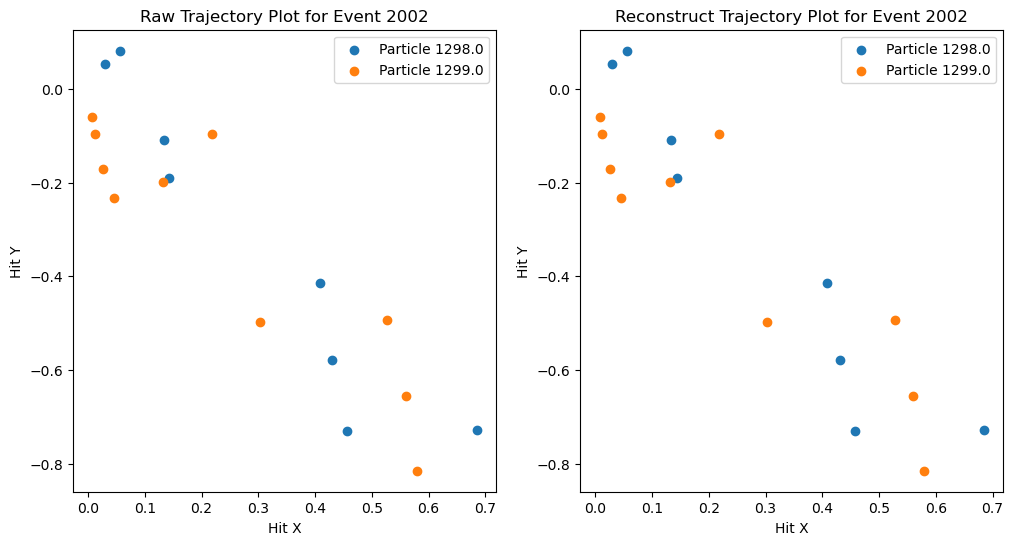

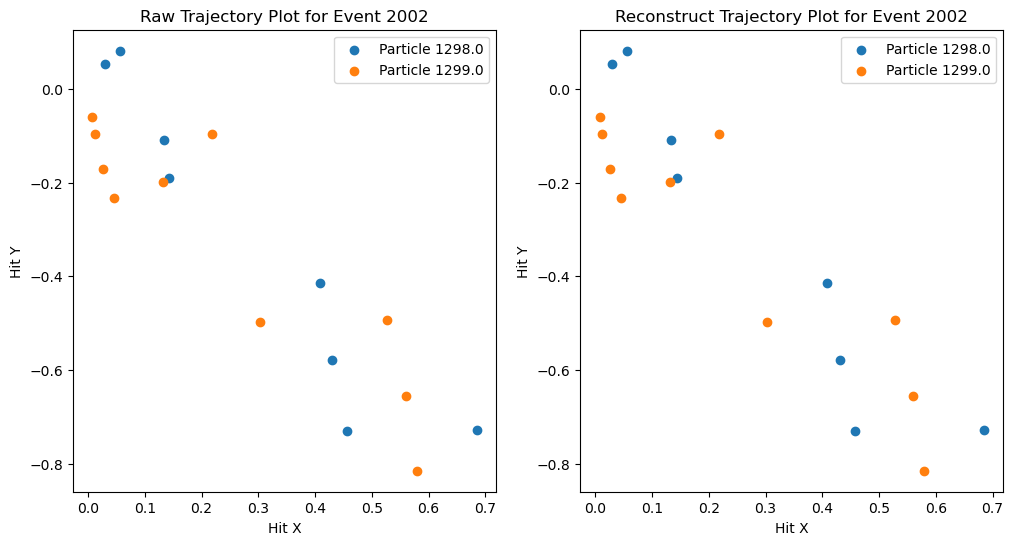

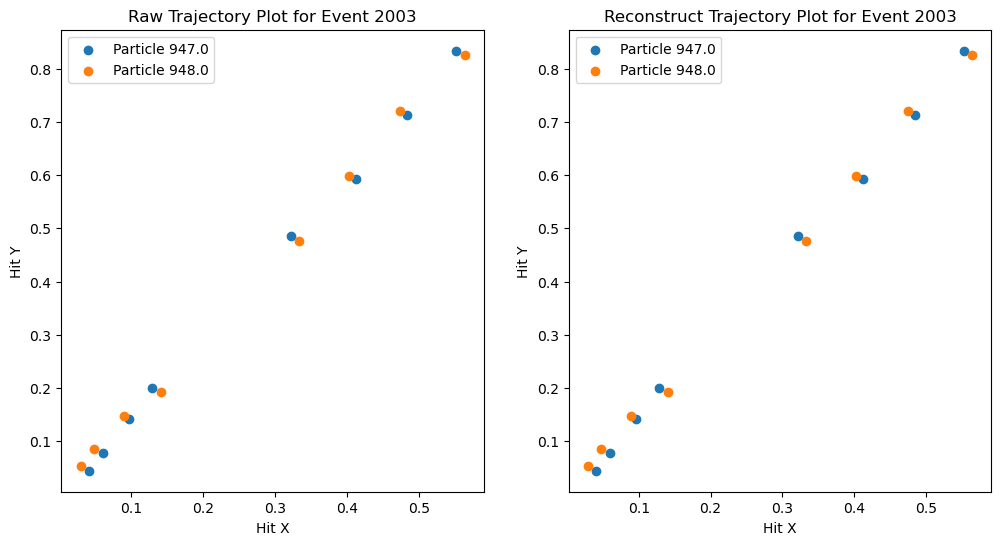

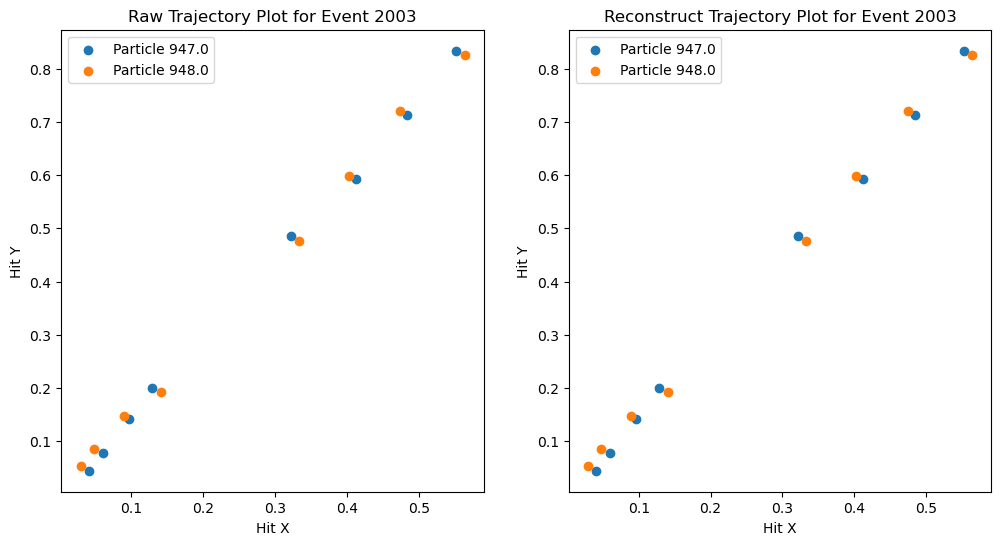

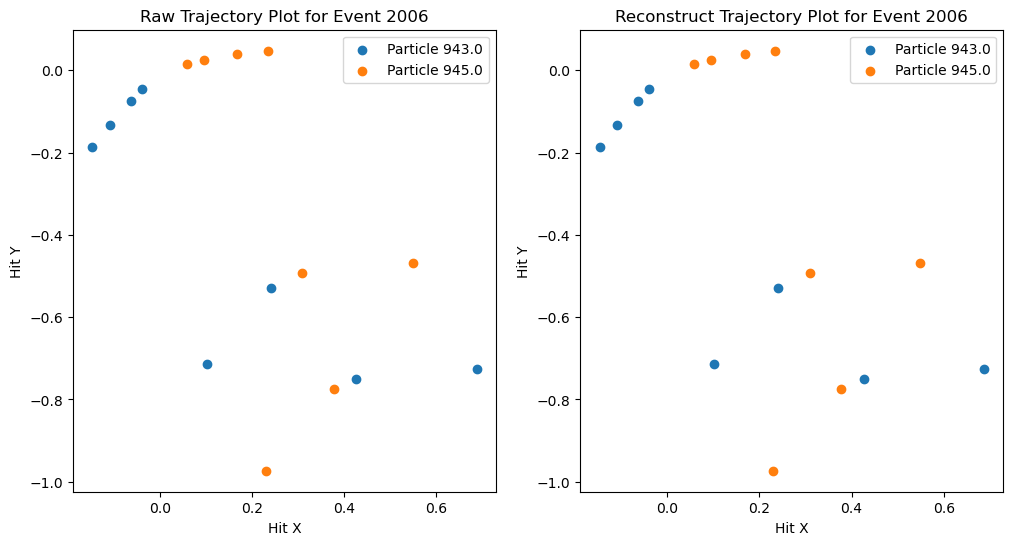

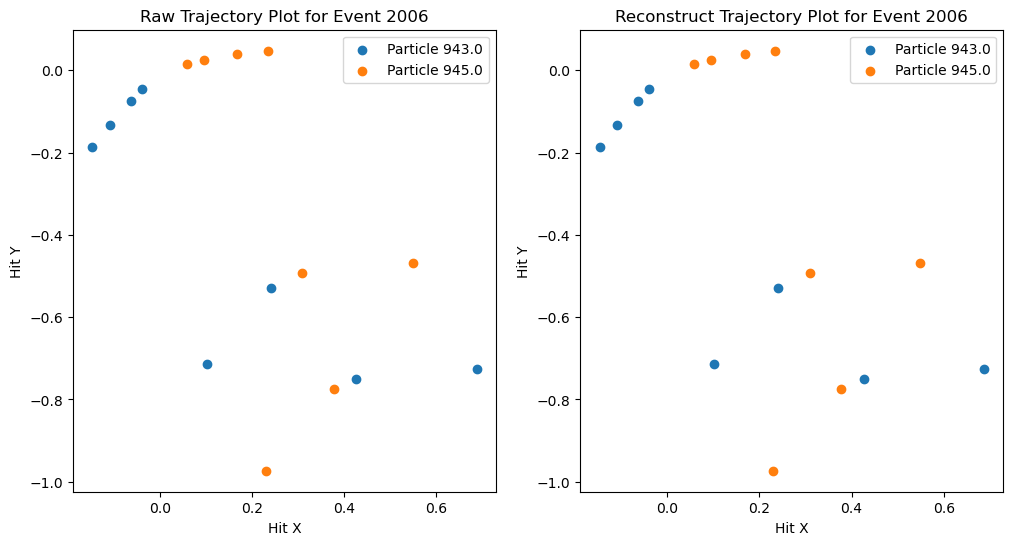

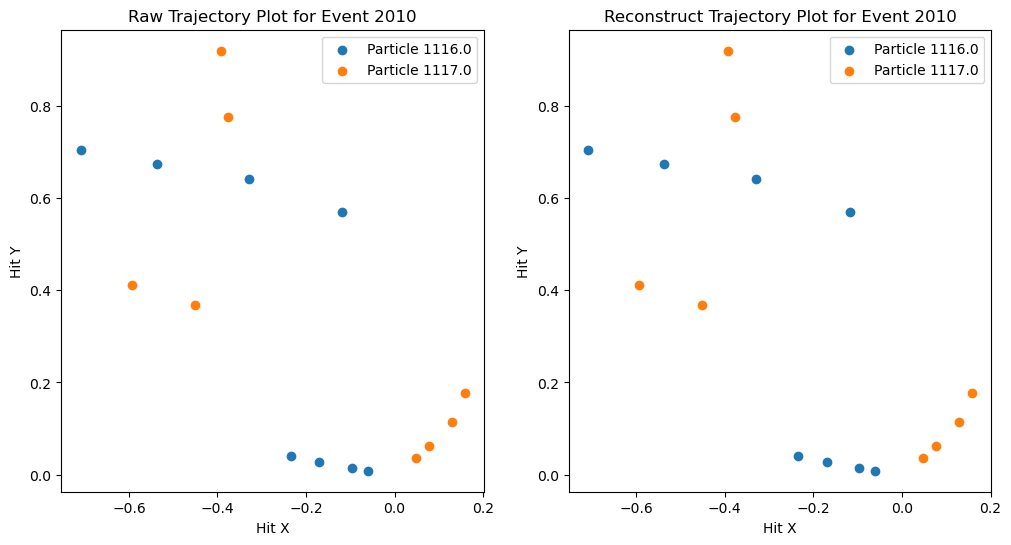

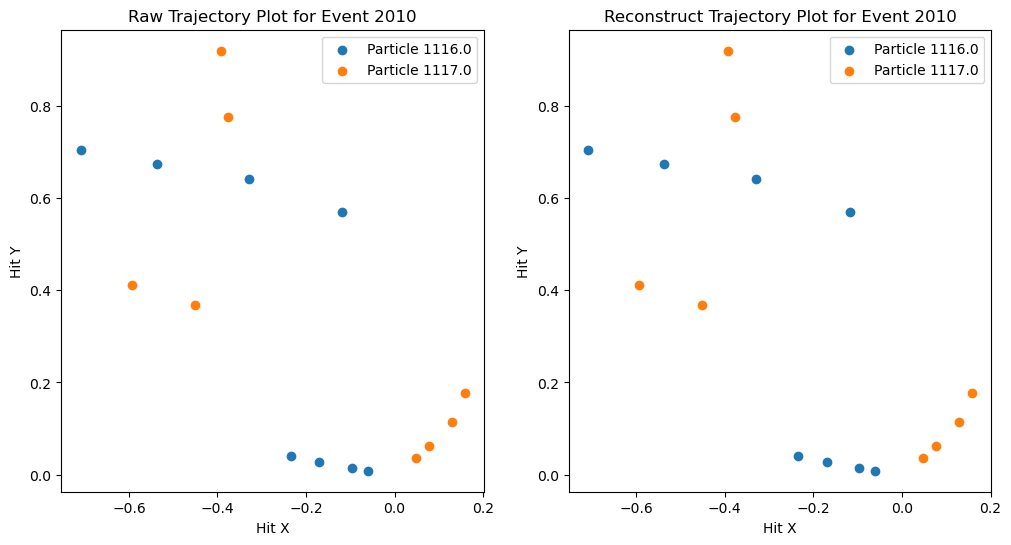

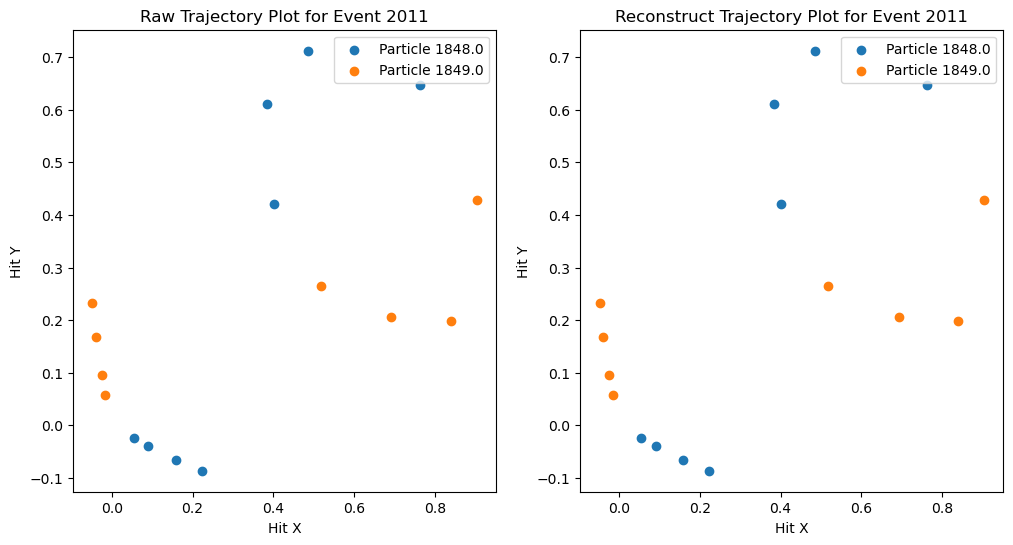

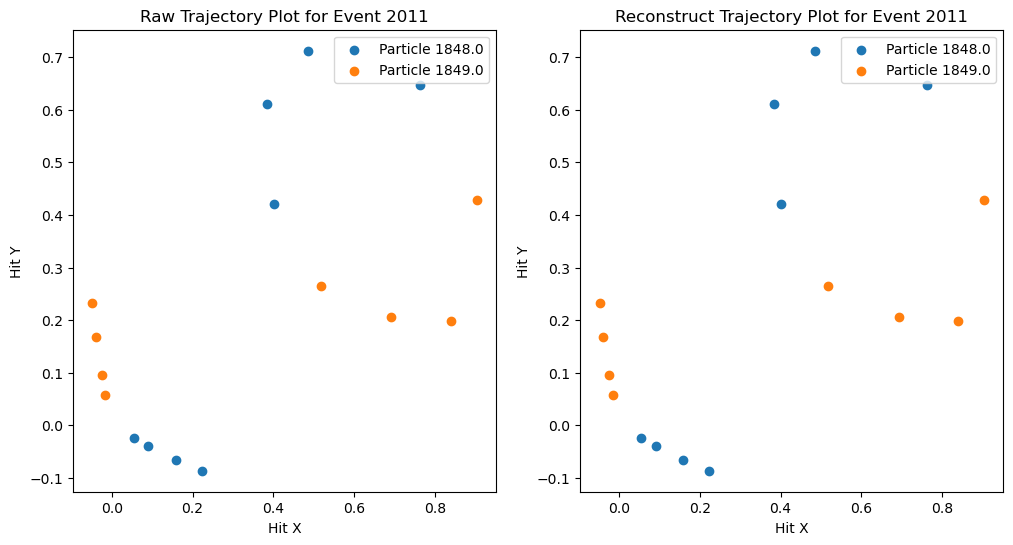

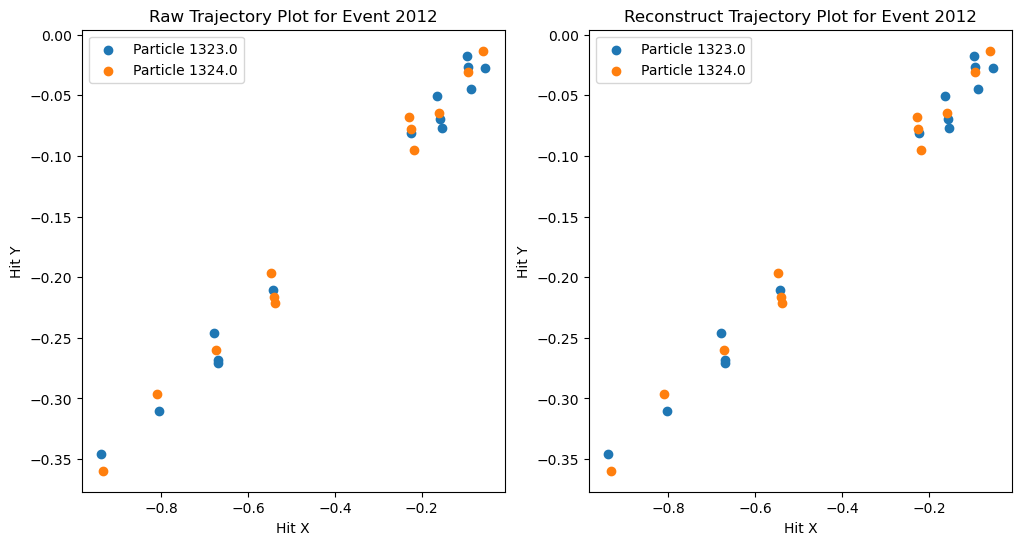

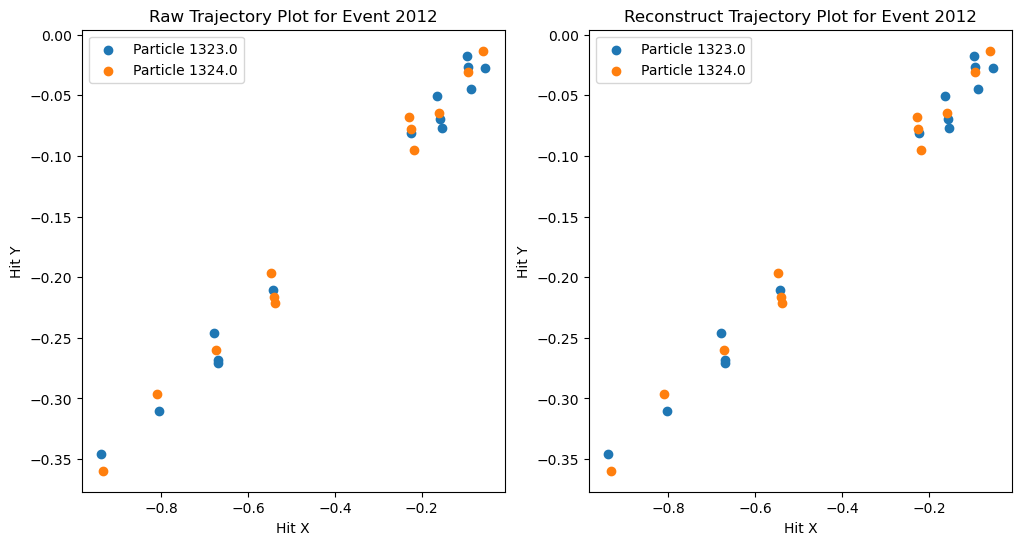

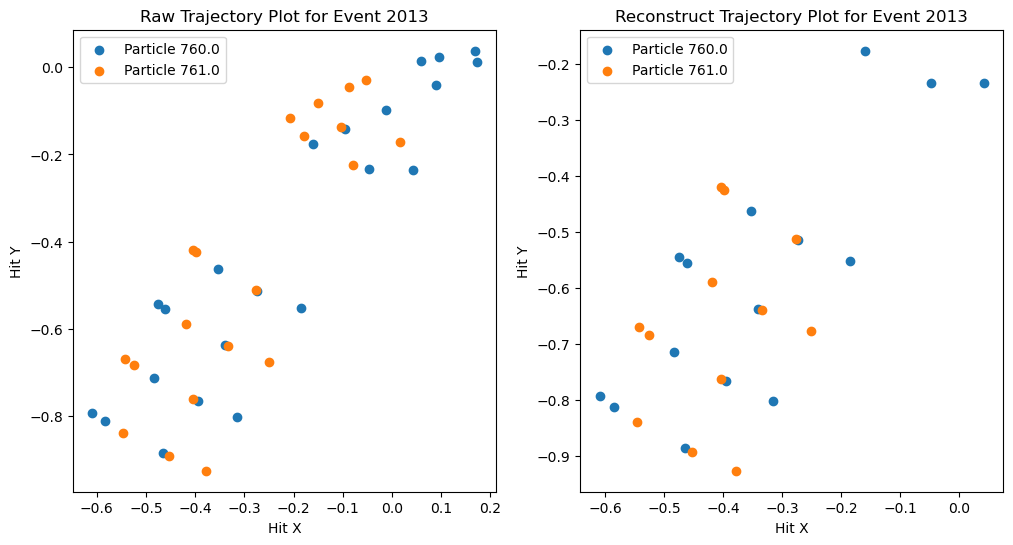

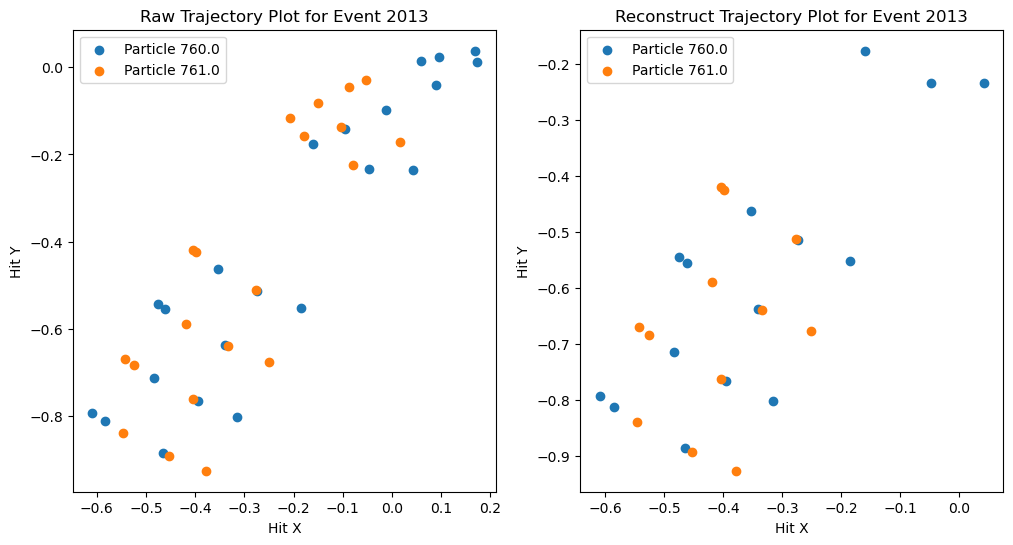

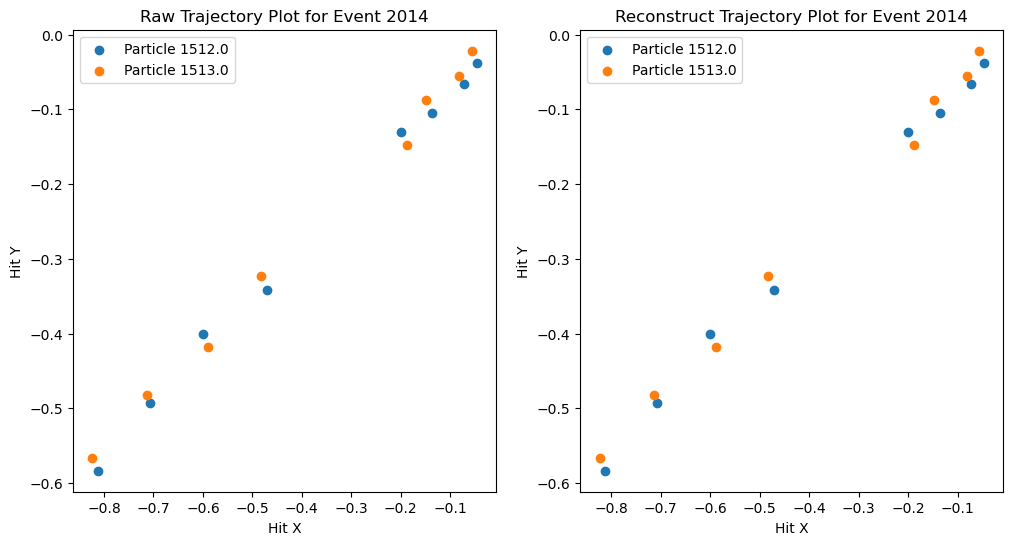

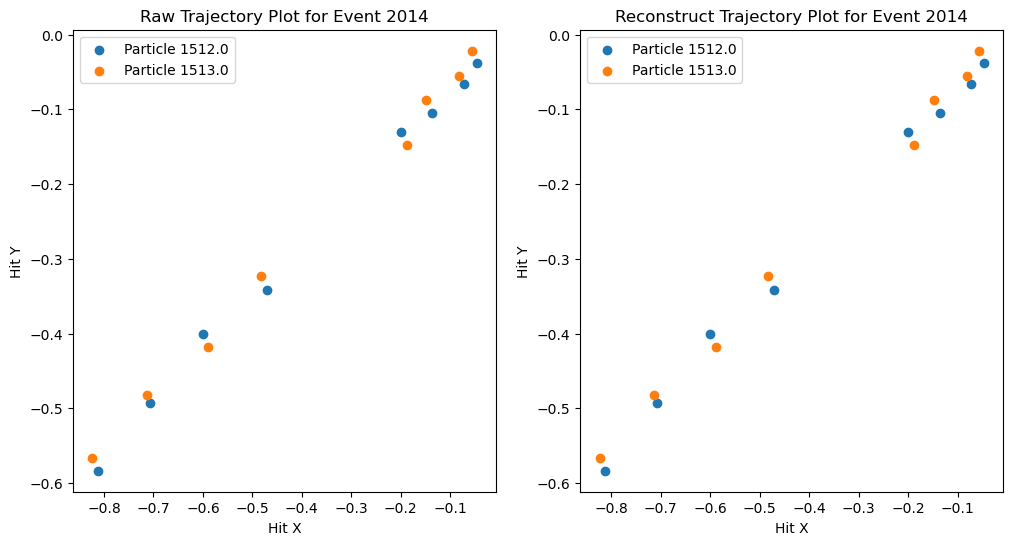

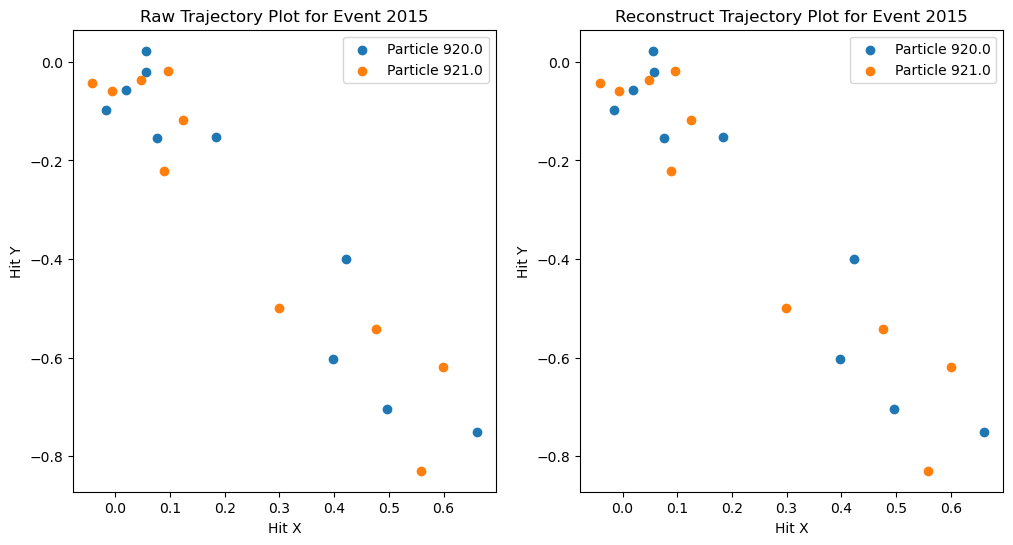

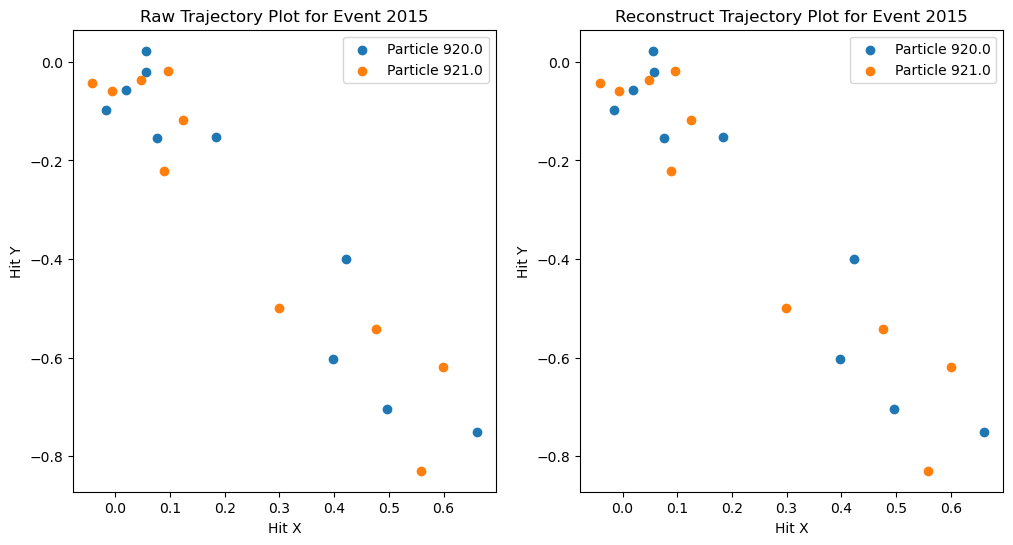

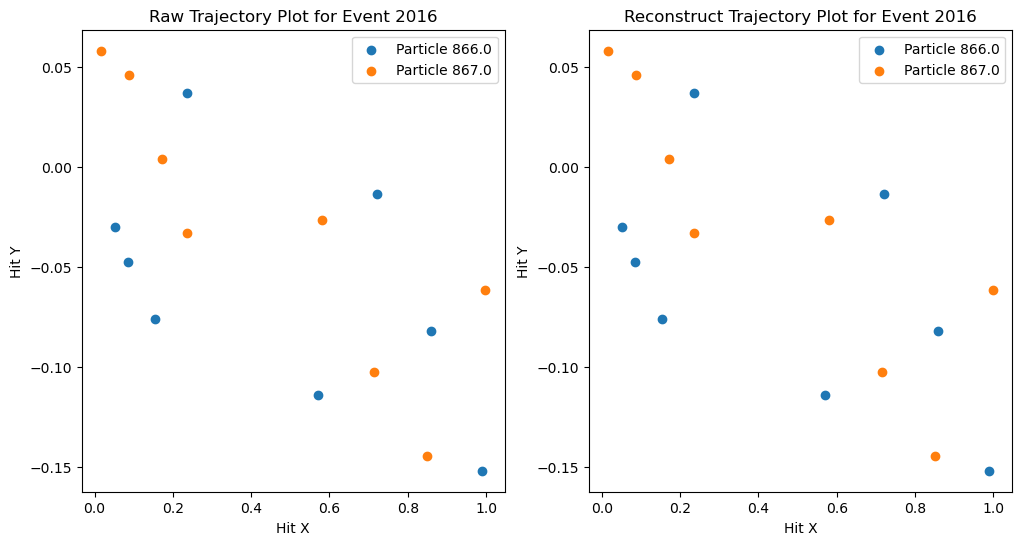

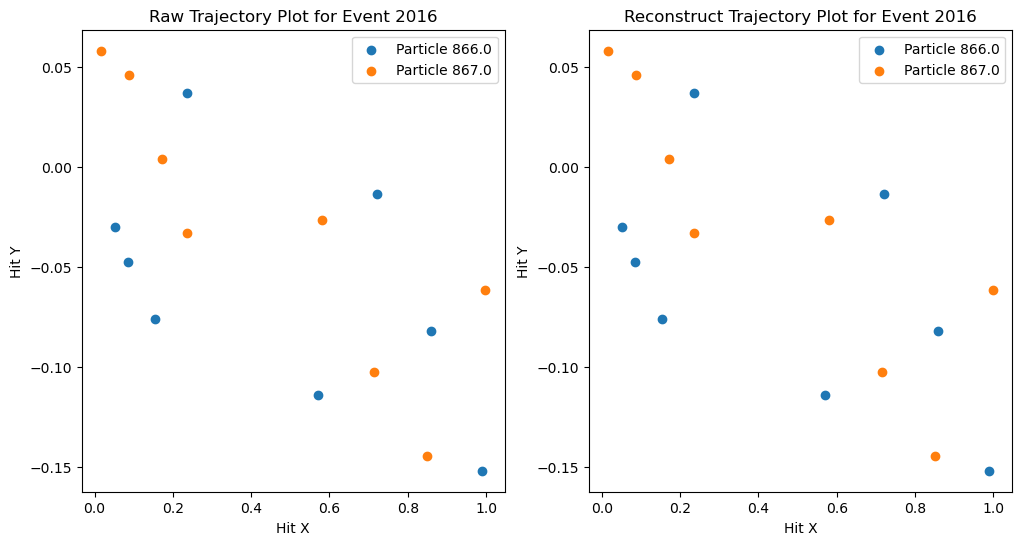

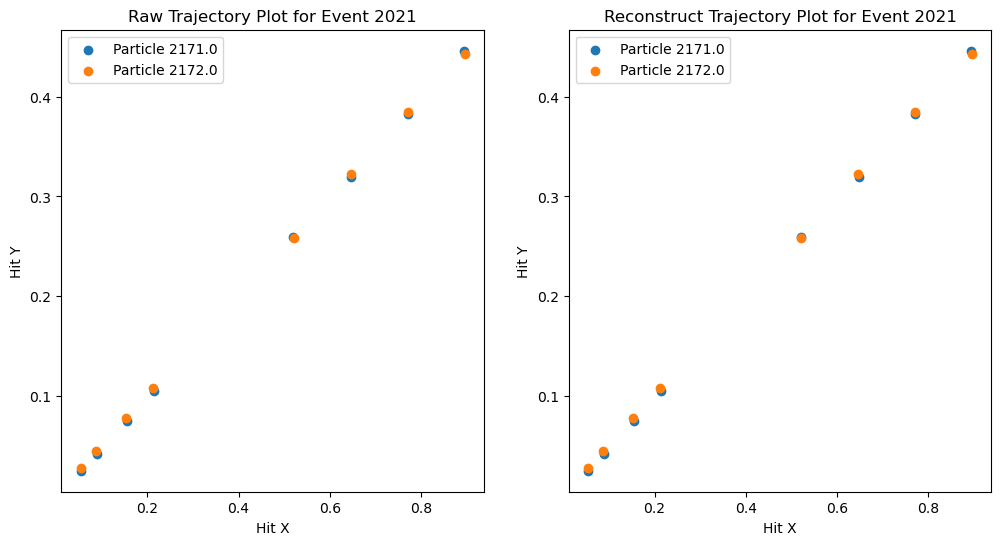

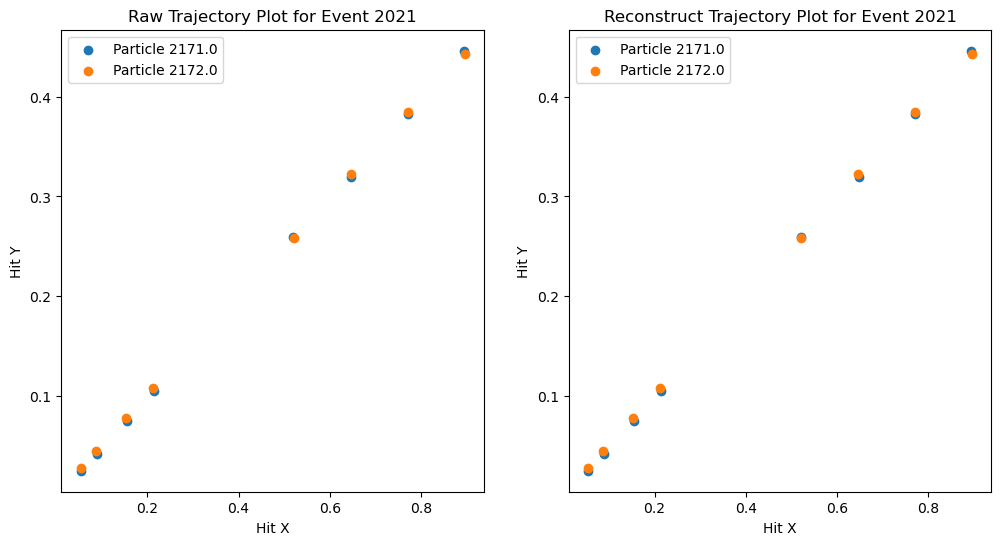

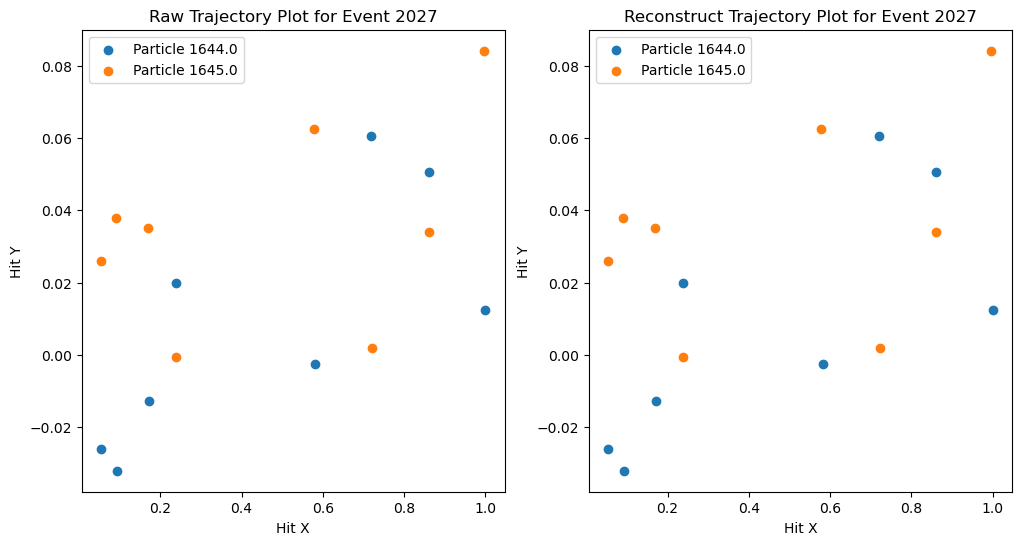

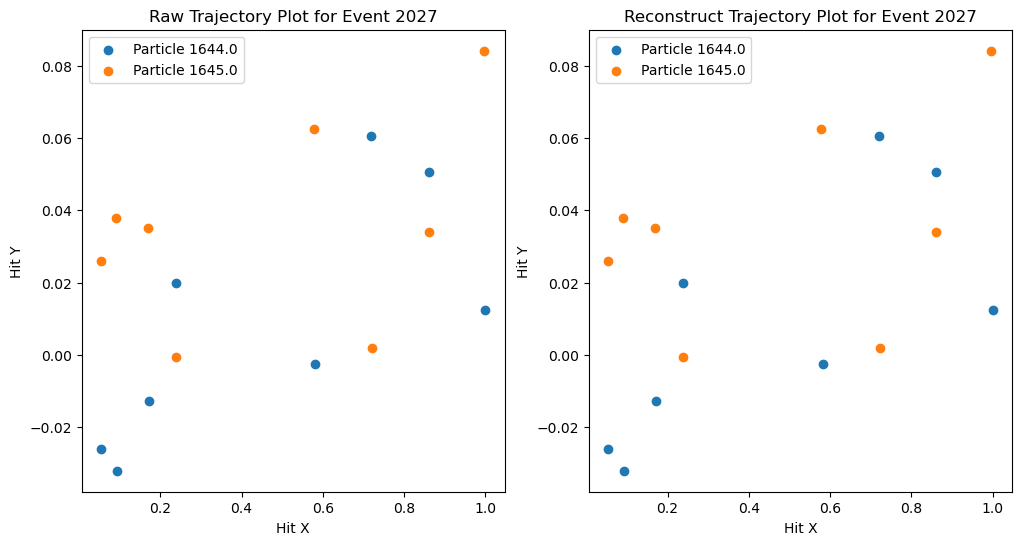

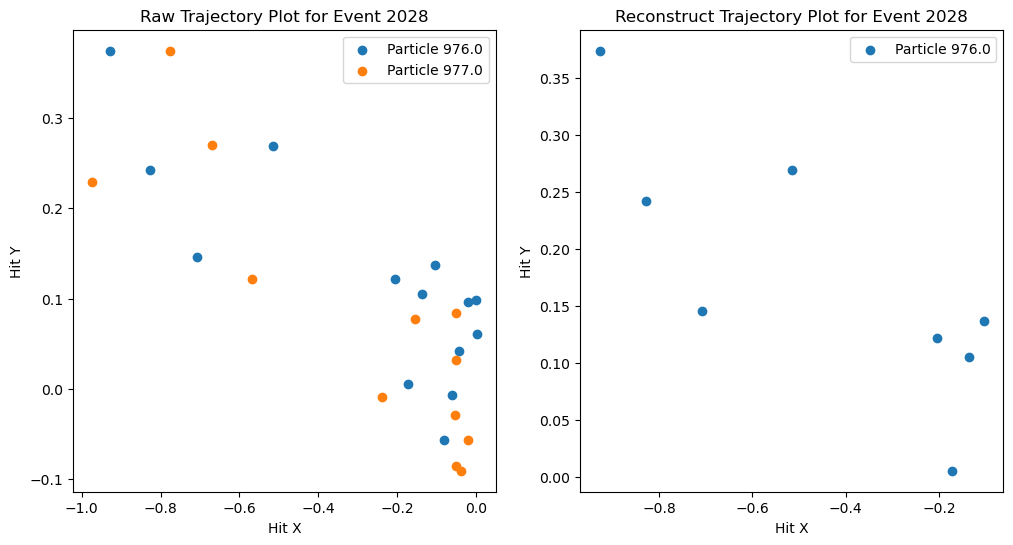

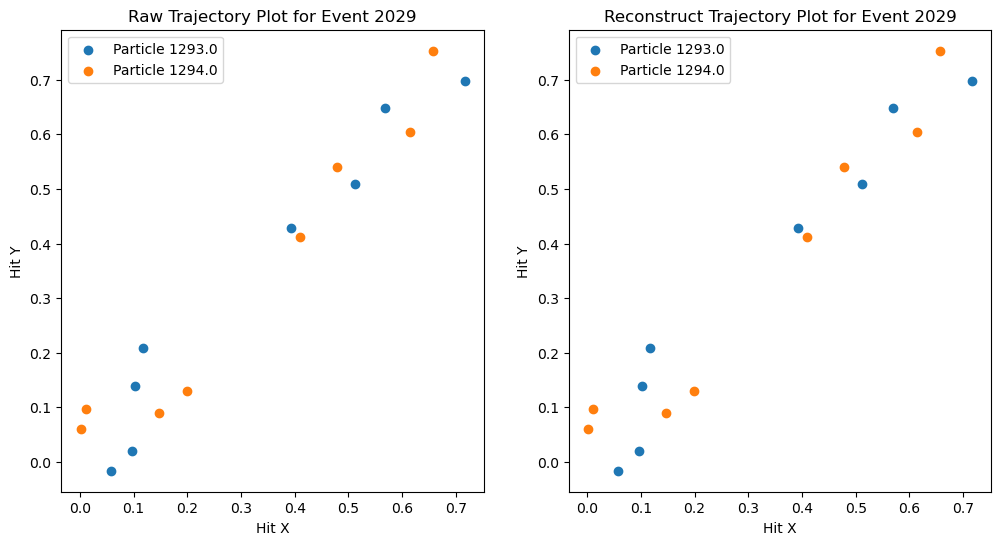

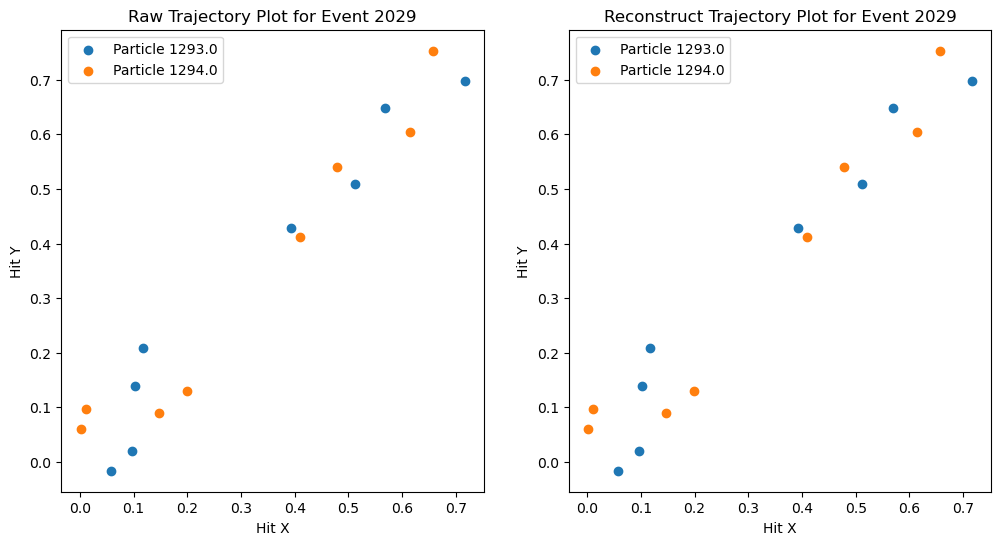

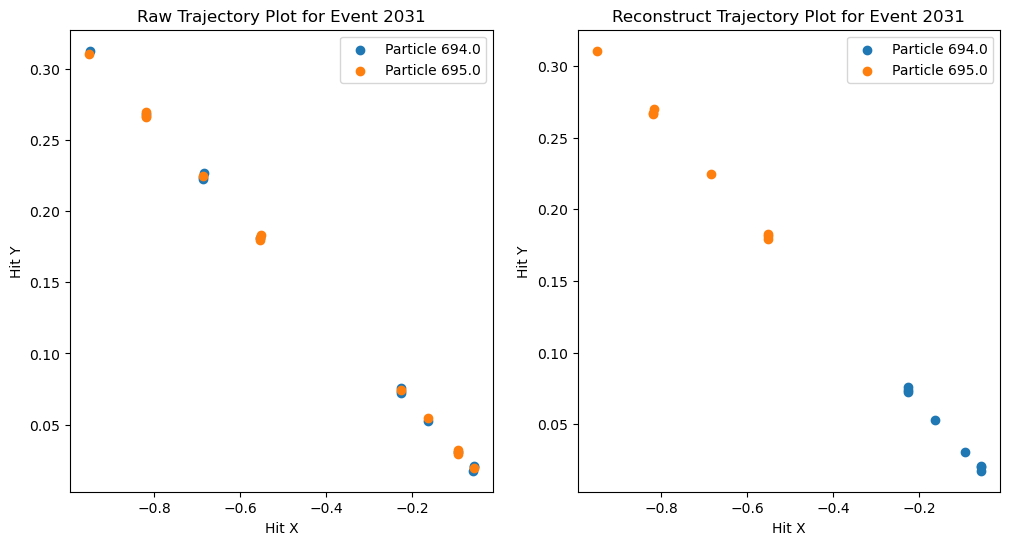

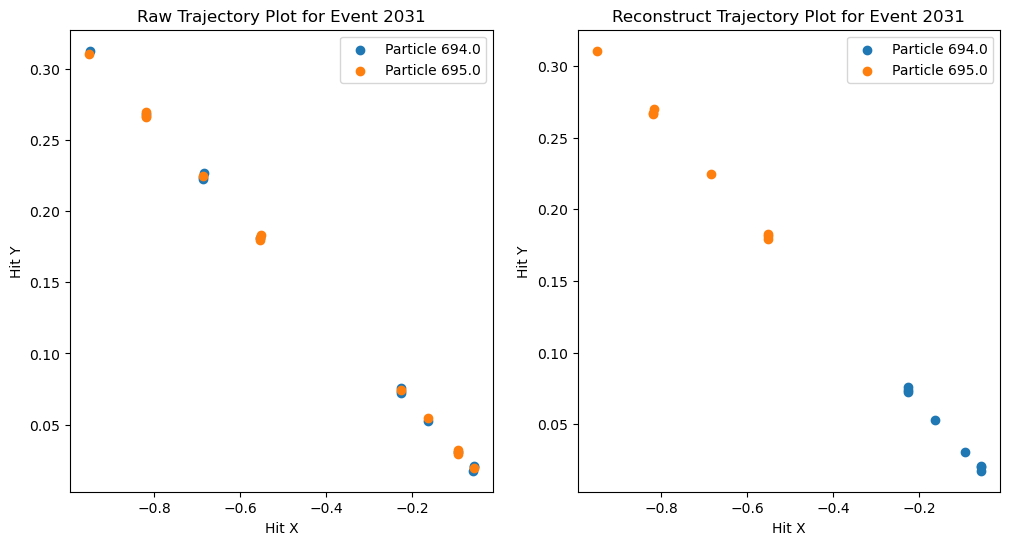

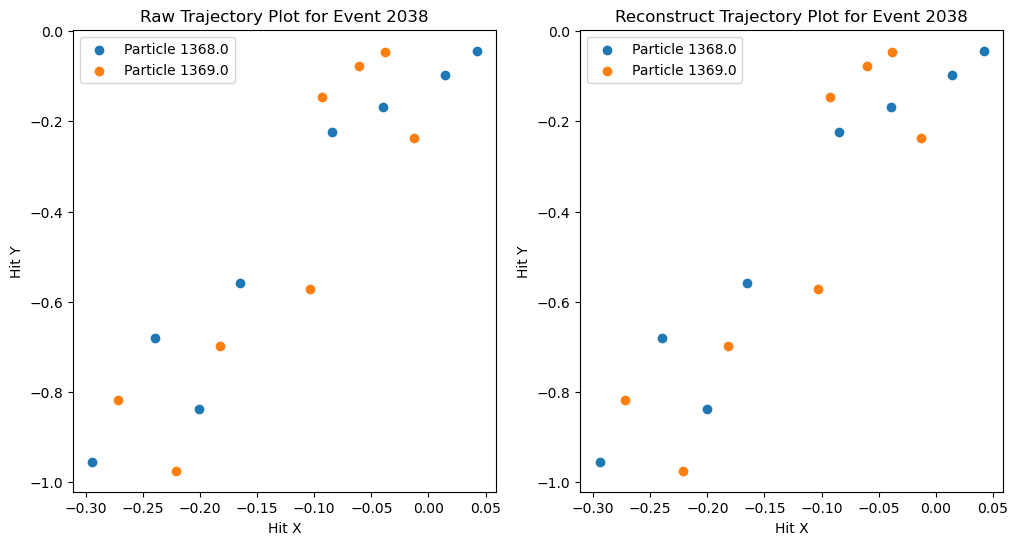

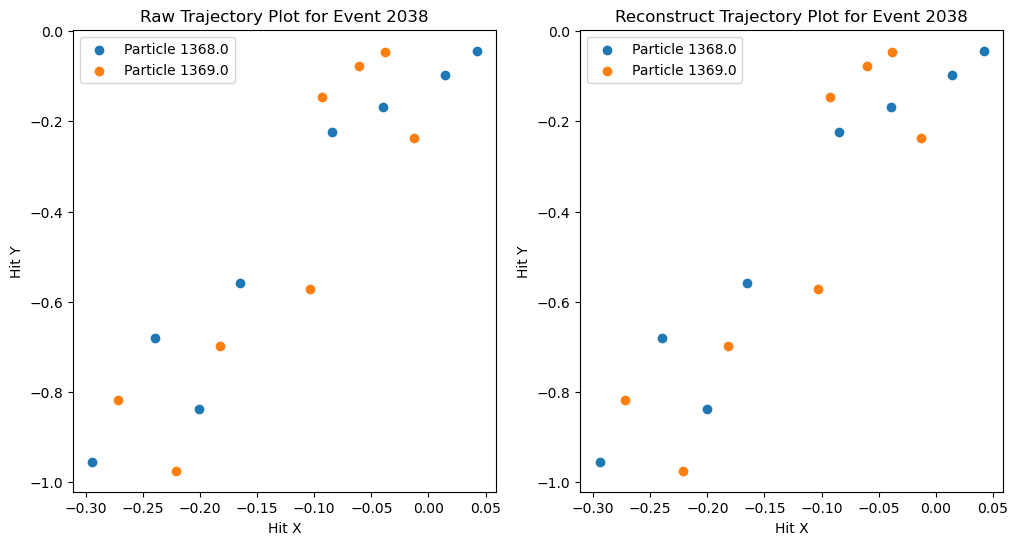

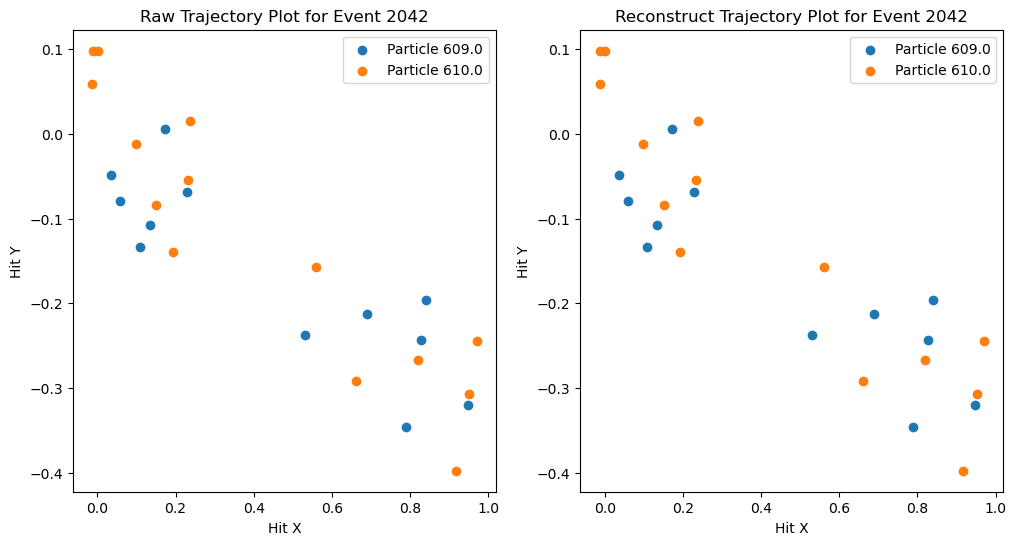

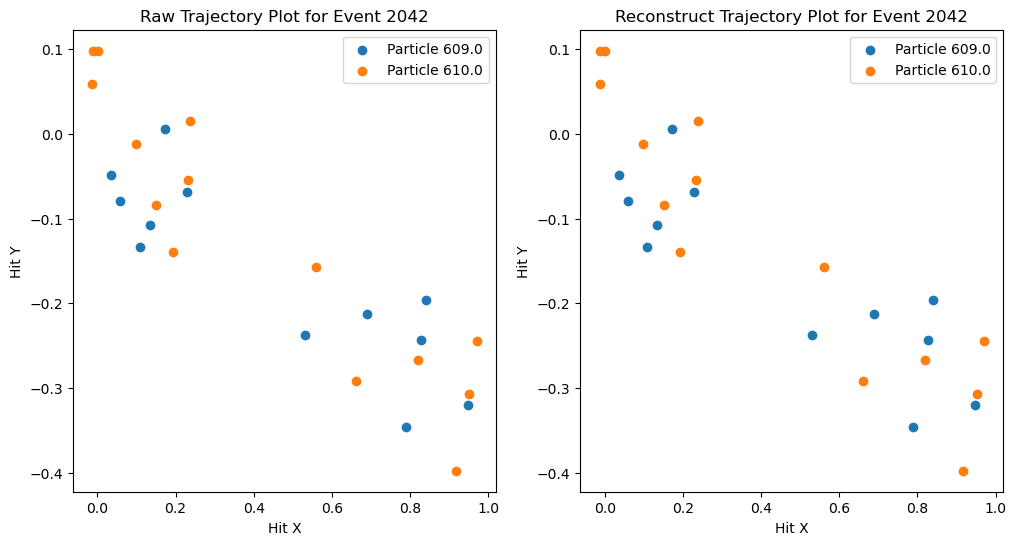

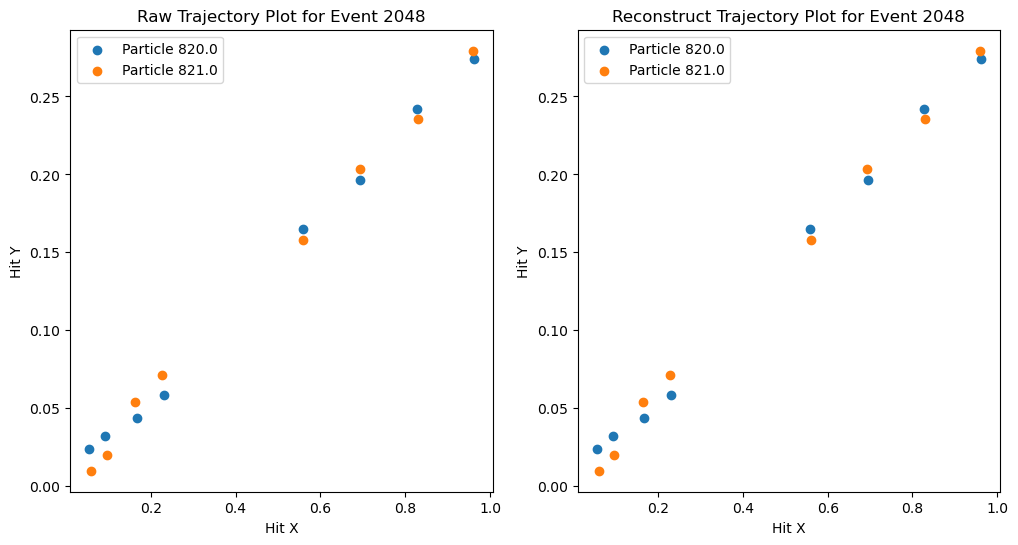

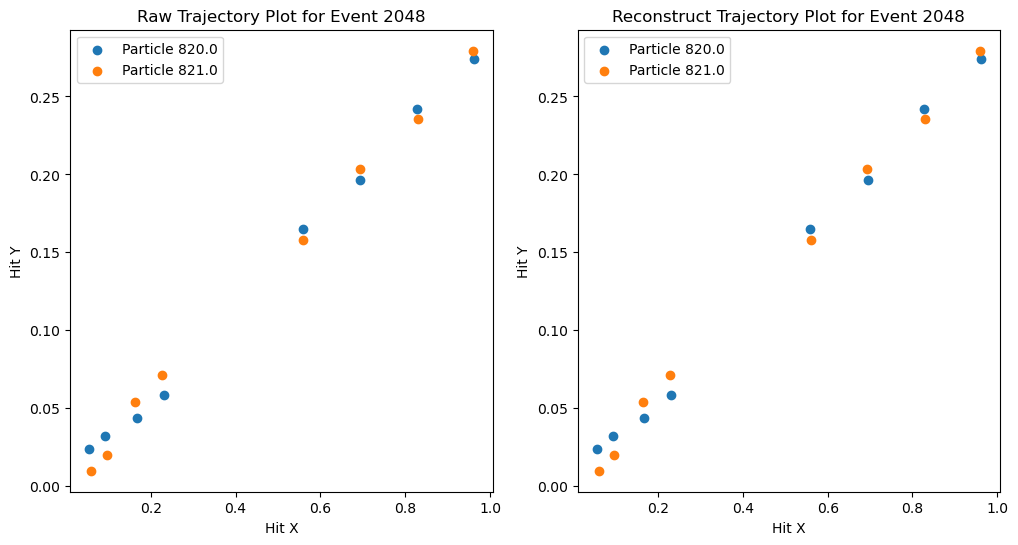

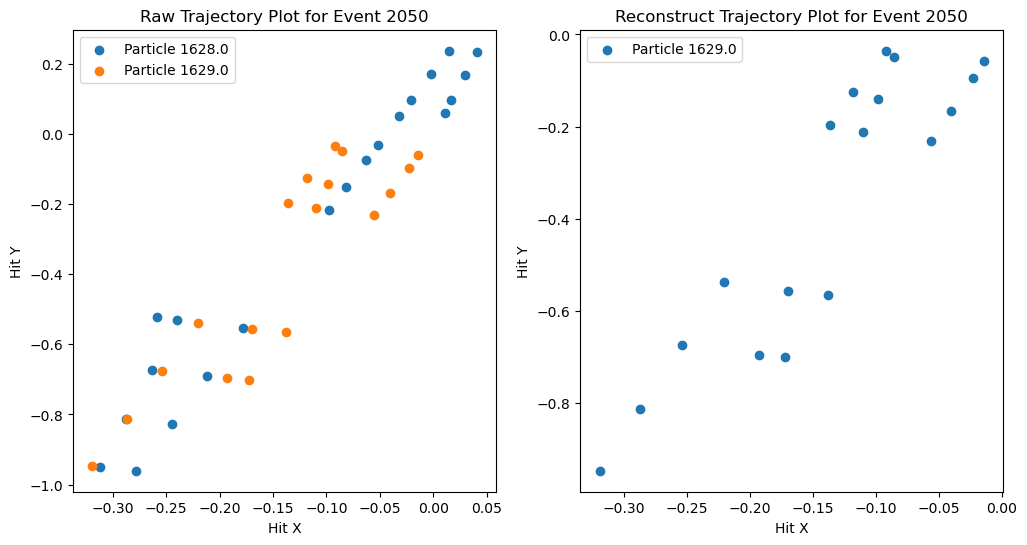

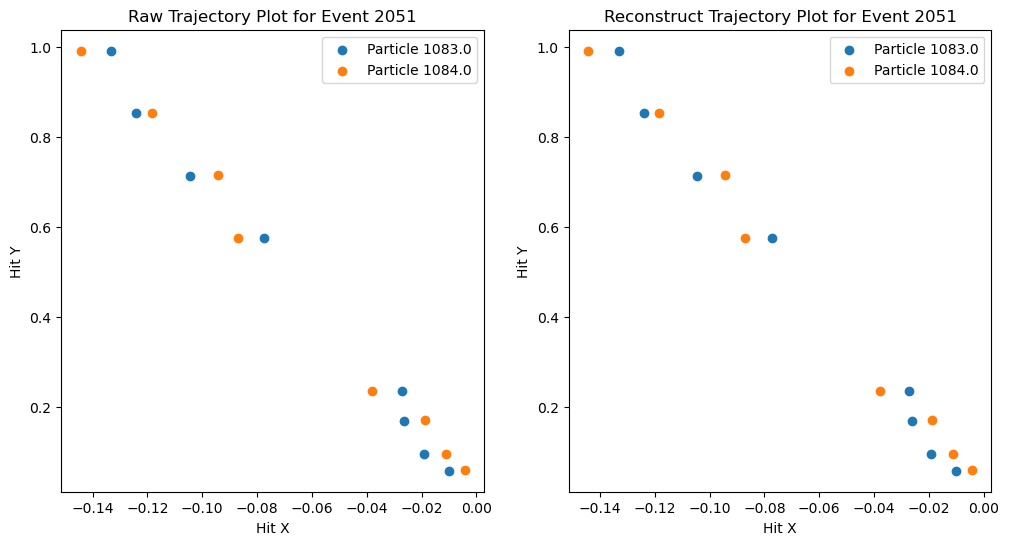

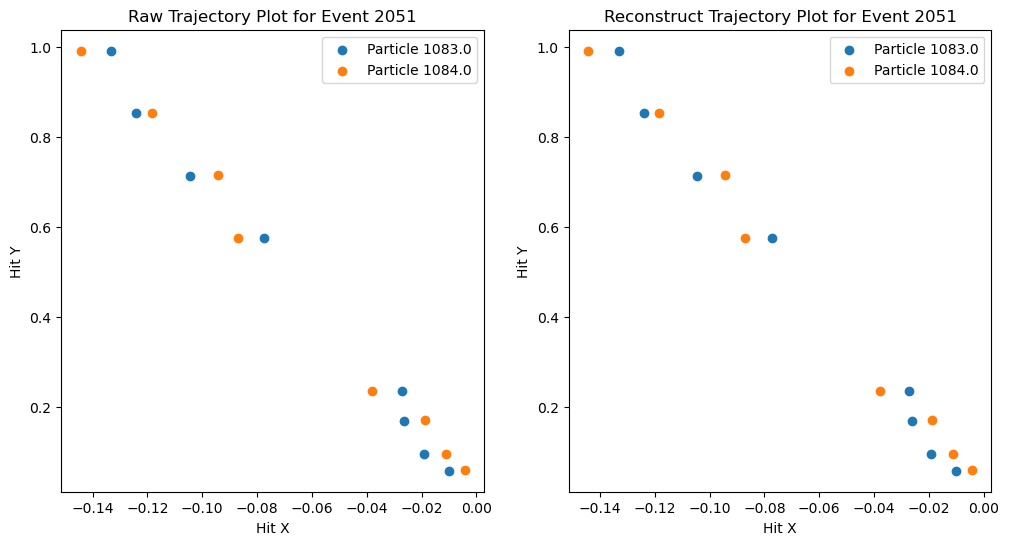

In [13]:
#Draw raw/reco plots

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
import os

output_directory = './plot/231011/quirk_nosel_2000_1400/compare_event_id_combine_2D_point'
df_quirk = pd.read_csv('./output/quirk_nosel/track_quirk_sel_2000_1400.csv')
os.makedirs(output_directory, exist_ok=True)


def plot_event_trajectories(df, event_number, df_reconstruct):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # Get unique particle_ids for the current event
    particle_ids = df['particle_id'].unique()

    for particle_id in particle_ids:
        # Plot the raw trajectory for each particle
        if particle_id in df['particle_id'].values:
            group = df[df['particle_id'] == particle_id]
            x = group['x']
            y = group['y']
            ax1.scatter(x, y, marker='o', label=f'Particle {particle_id}')
            #ax1.plot(x, y, marker='o', linestyle='-', label=f'Particle {particle_id}')

        # Plot the reconstructed trajectory for each particle
        if particle_id in df_reconstruct['particle_id'].values:
            group_reco = df_reconstruct[df_reconstruct['particle_id'] == particle_id]
            x_recon = group_reco['x']
            y_recon = group_reco['y']
            ax2.scatter(x_recon, y_recon, marker='o', label=f'Particle {particle_id}')
            #ax2.plot(x_recon, y_recon, marker='o', linestyle='-', label=f'Particle {particle_id}')

    ax1.set_xlabel('Hit X')
    ax1.set_ylabel('Hit Y')

    ax1.set_title(f'Raw Trajectory Plot for Event {event_number}')
    ax1.legend()

    ax2.set_xlabel('Hit X')
    ax2.set_ylabel('Hit Y')

    ax2.set_title(f'Reconstruct Trajectory Plot for Event {event_number}')
    ax2.legend()

    output_file_path = os.path.join(output_directory, f'E{event_number}_Trajectories.png')
    plt.savefig(output_file_path)

        
reconstruct_data = df_quirk.drop_duplicates(subset=['particle_id'])
event_file_array = reconstruct_data['event_id'].to_numpy()[:40]
# 循环处理每个 event_number
# Loop through each event and plot trajectories for both particles
for event_number in event_file_array:
    file_hit_name = f"../QuirkTracking/datasets/Lambda500_quirk/Quirk/event00000{event_number}-hits.csv"
    df = pd.read_csv(file_hit_name)
    df['r'] = (df['r']) / 51.4
    df['x'] = (df['r']) * np.cos(df['phi'])
    df['y'] = (df['r']) * np.sin(df['phi'])
    df['z'] = df['z'] / 100.

    # Read particle data and calculate the angle
    file_particle_name = f"../QuirkTracking/datasets/Lambda500_quirk/Quirk/event00000{event_number}-particles.csv"
    dfp = pd.read_csv(file_particle_name)
    #particle1 = dfp.iloc[0][['px', 'py', 'pz']]
    #particle2 = dfp.iloc[1][['px', 'py', 'pz']]
    #magnitude1 = np.linalg.norm(particle1)
    #magnitude2 = np.linalg.norm(particle2)
    #cosine_theta = np.dot(particle1, particle2) / (magnitude1 * magnitude2)
    #angle_radians = math.acos(cosine_theta)
    #angle_degrees = math.degrees(angle_radians)
    #print(f"The angle between two particles in Event {event_number}: degree: {angle_degrees}, rad: {angle_radians}")

    # Get reconstruction data for the current event
    df_reconstruct = df_quirk[df_quirk['event_id'] == event_number]

    # Plot trajectories for both particles in the event
    plot_event_trajectories(df, event_number, df_reconstruct)

/tmp/qsha/ipykernel_2015662/53794253.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(12, 6))


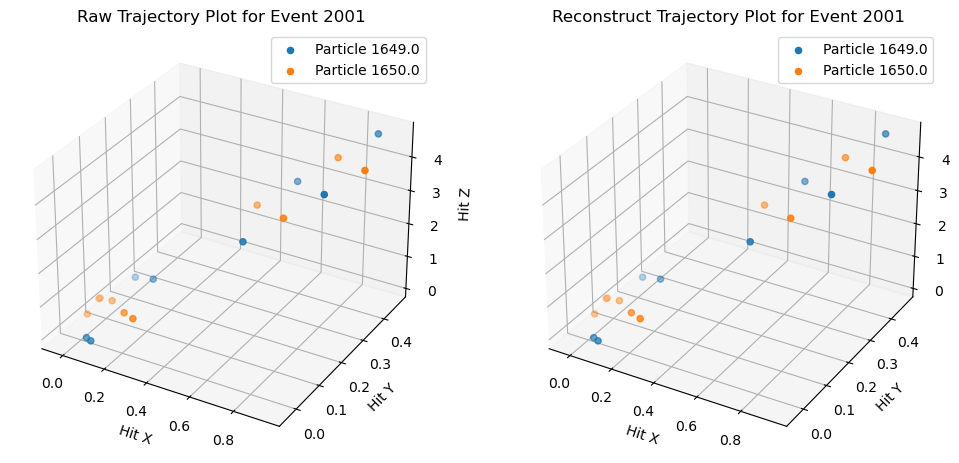

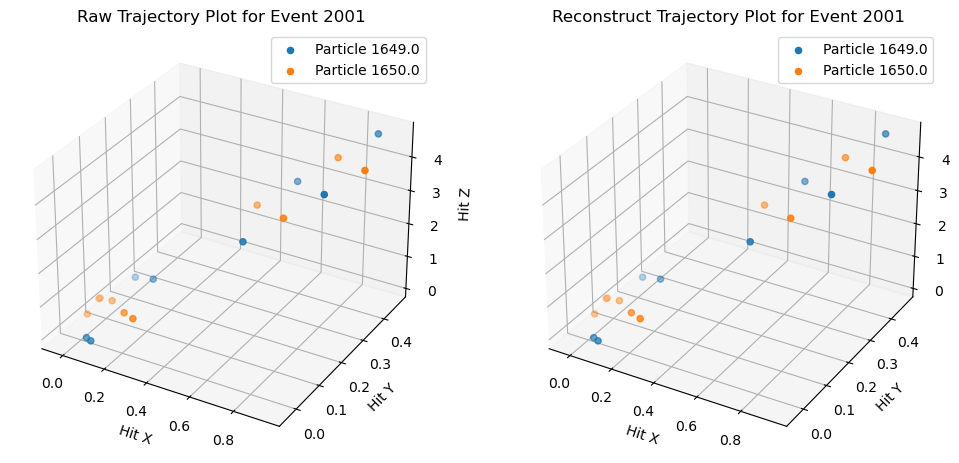

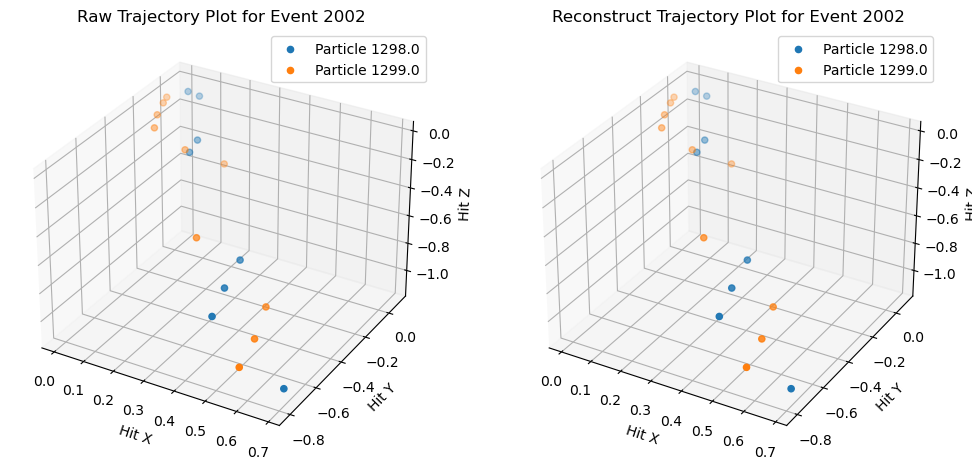

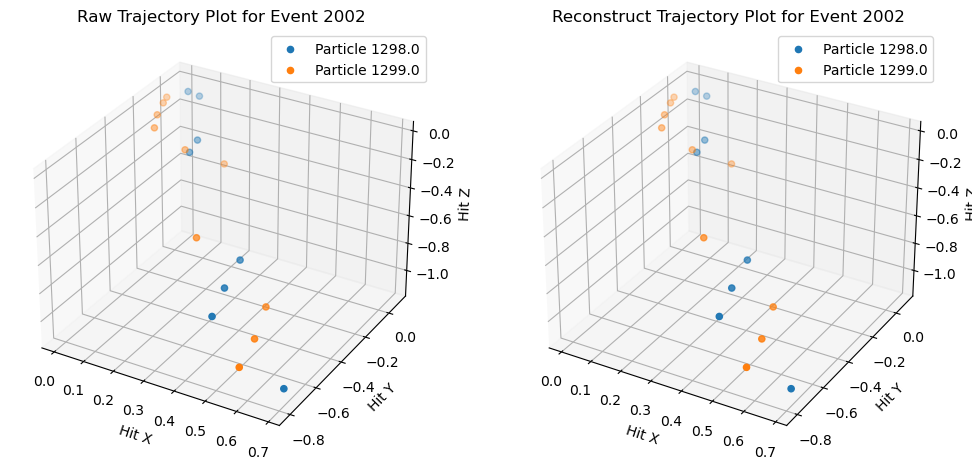

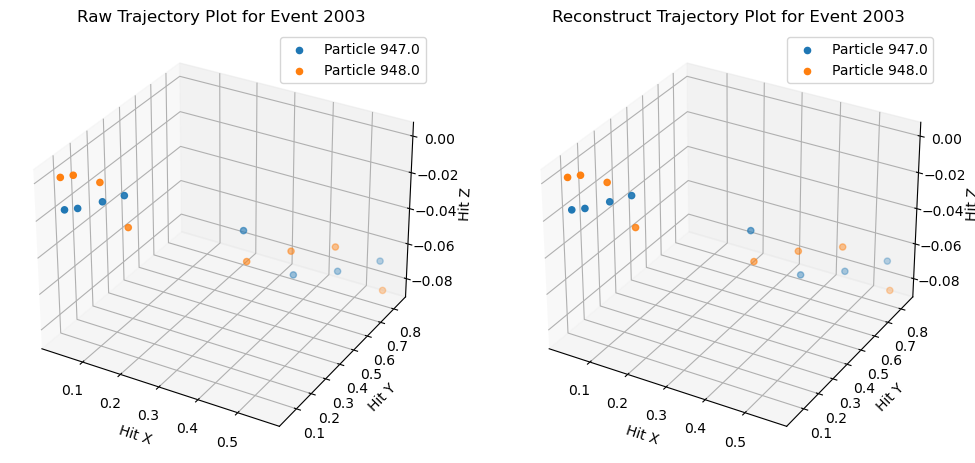

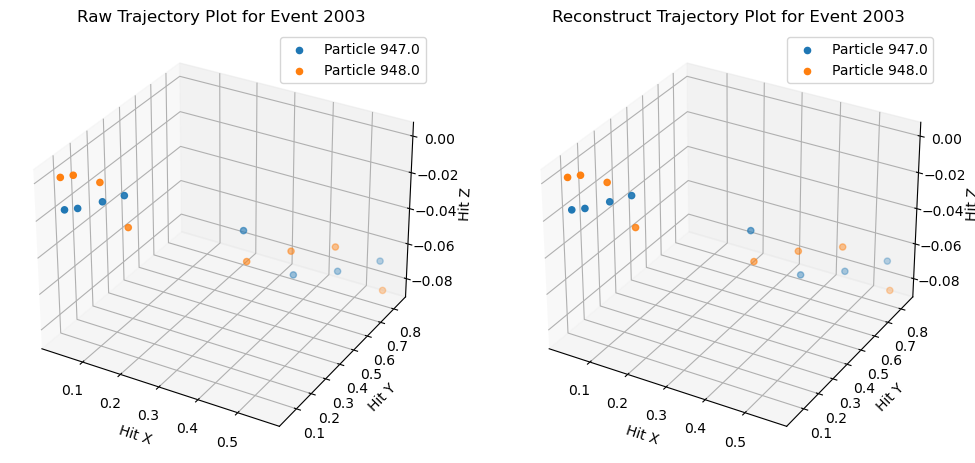

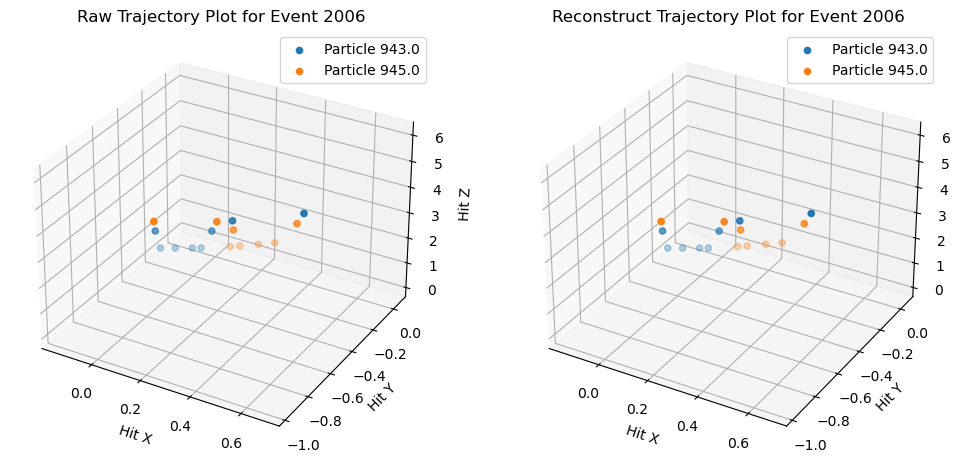

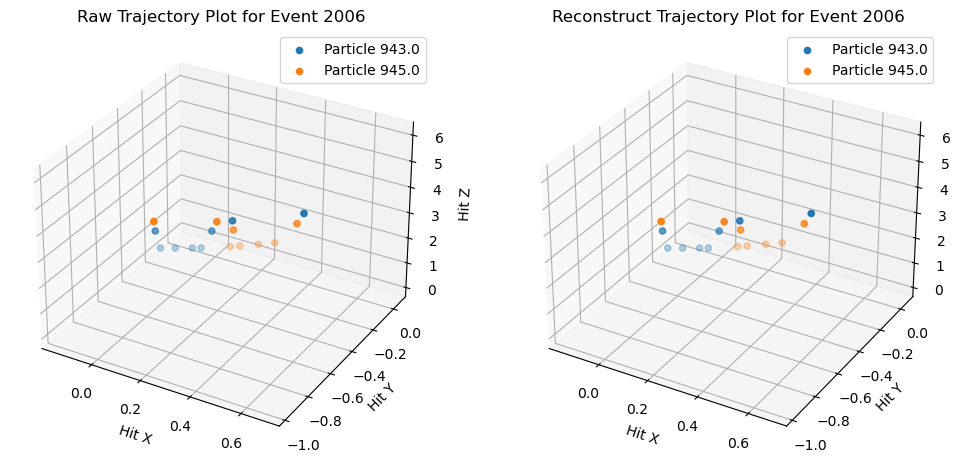

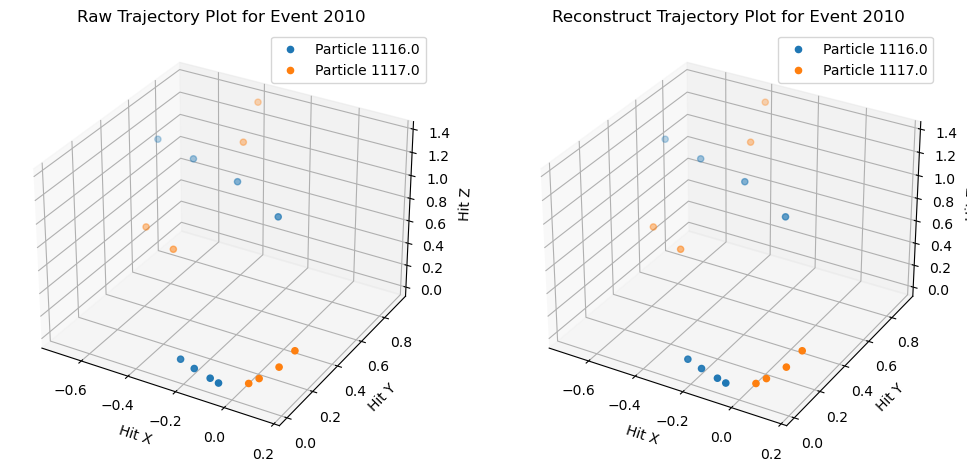

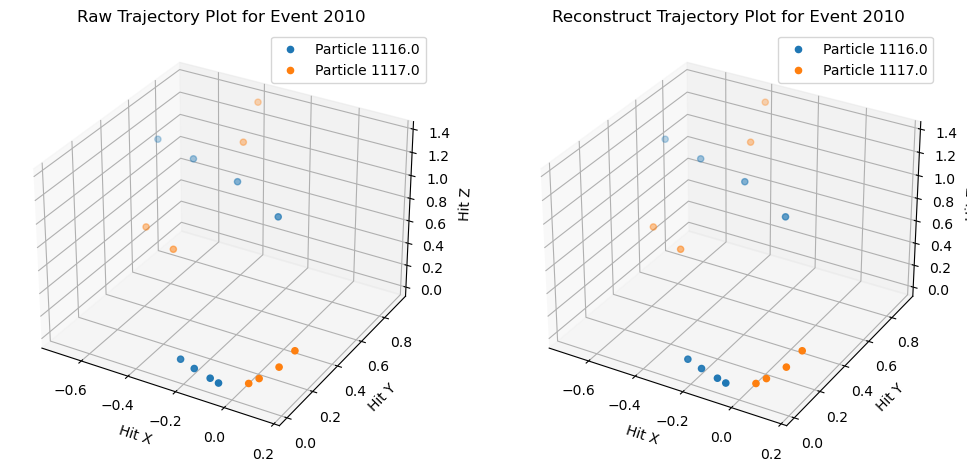

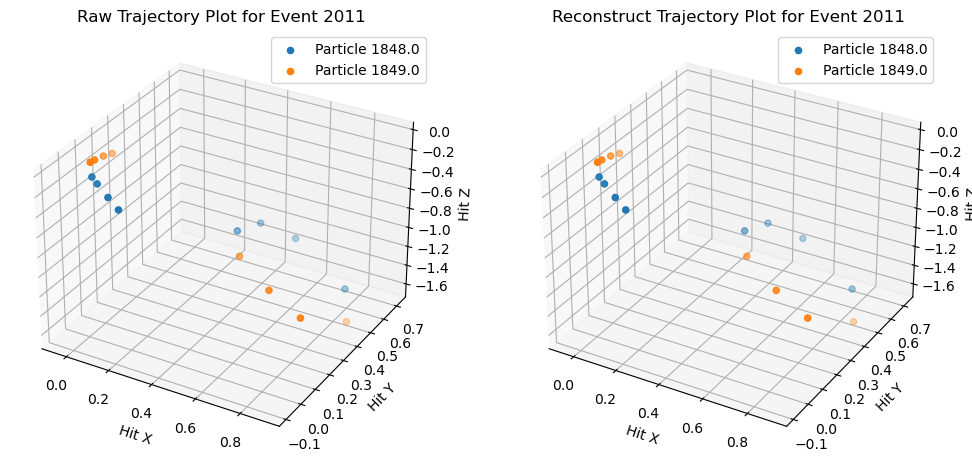

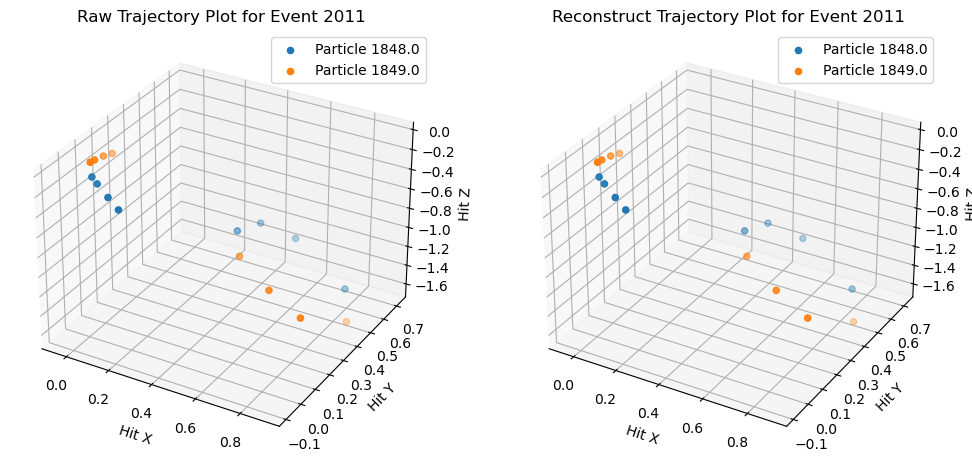

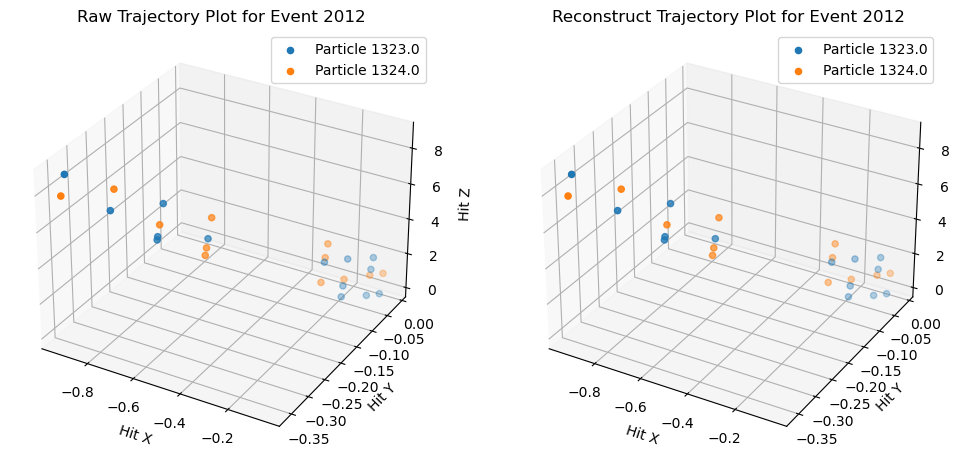

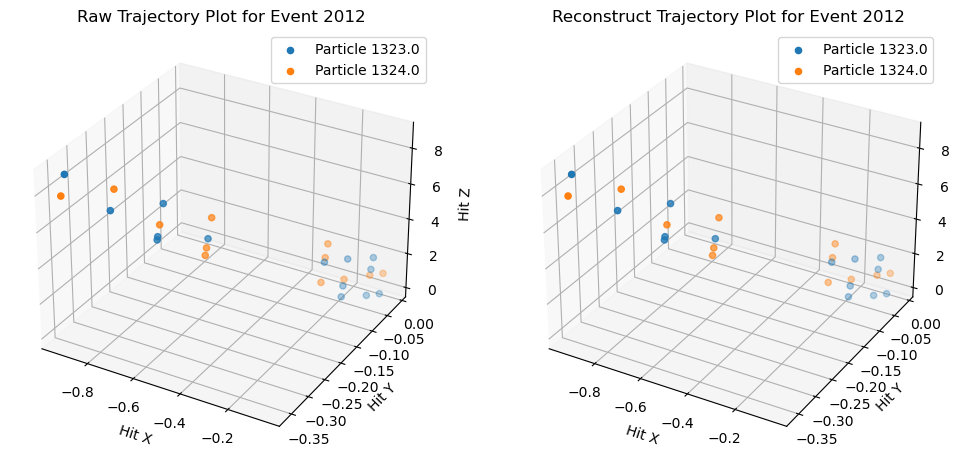

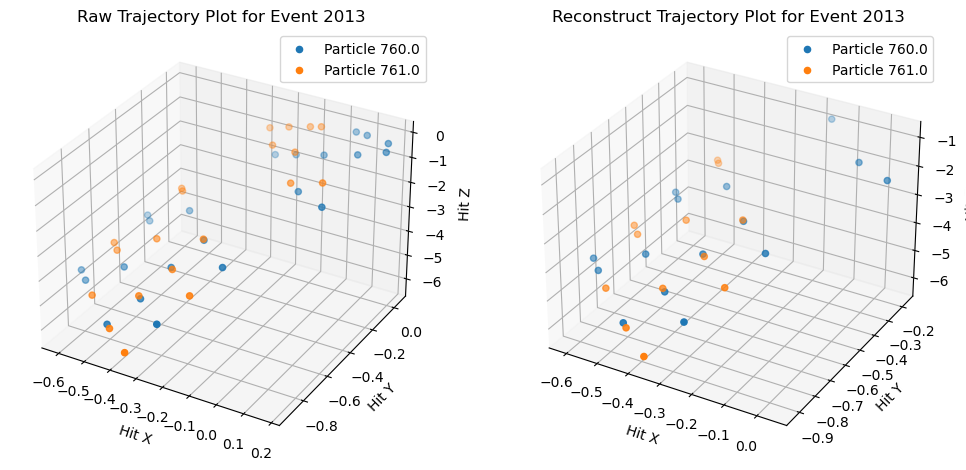

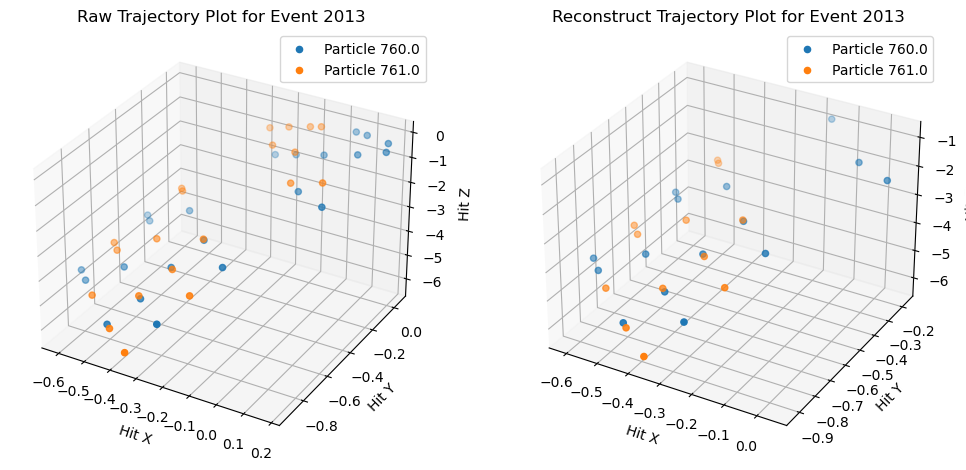

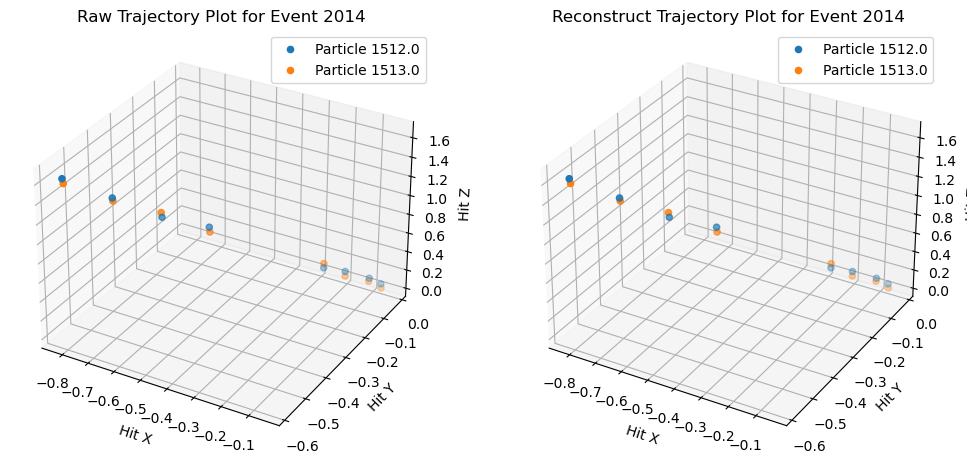

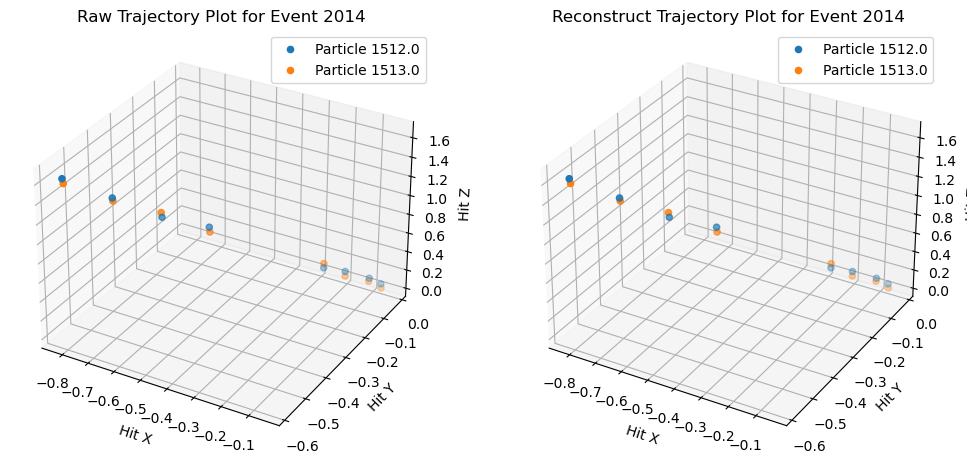

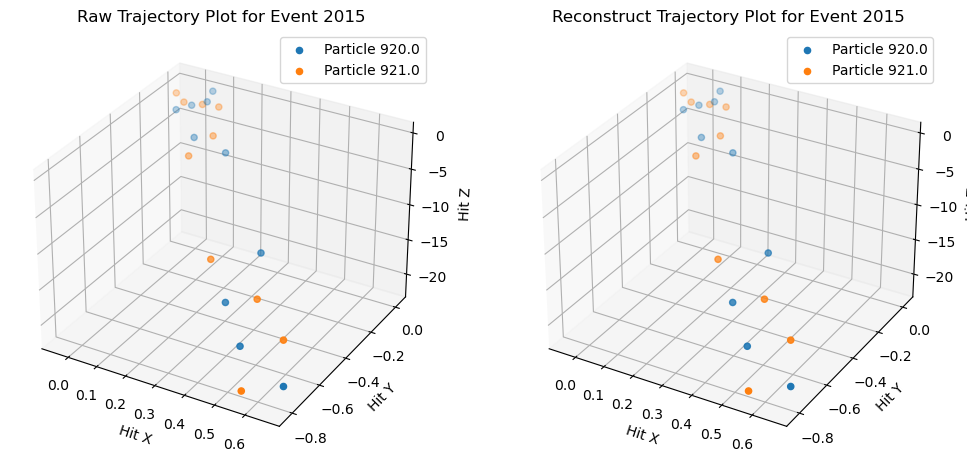

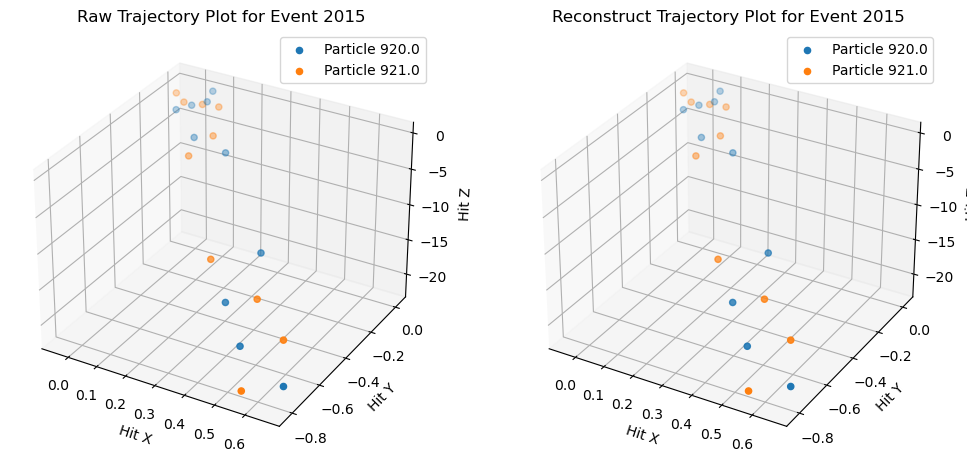

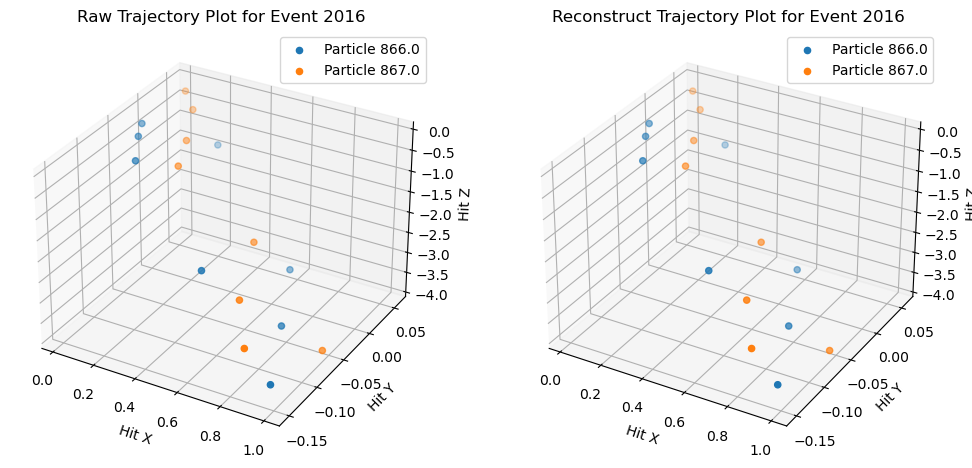

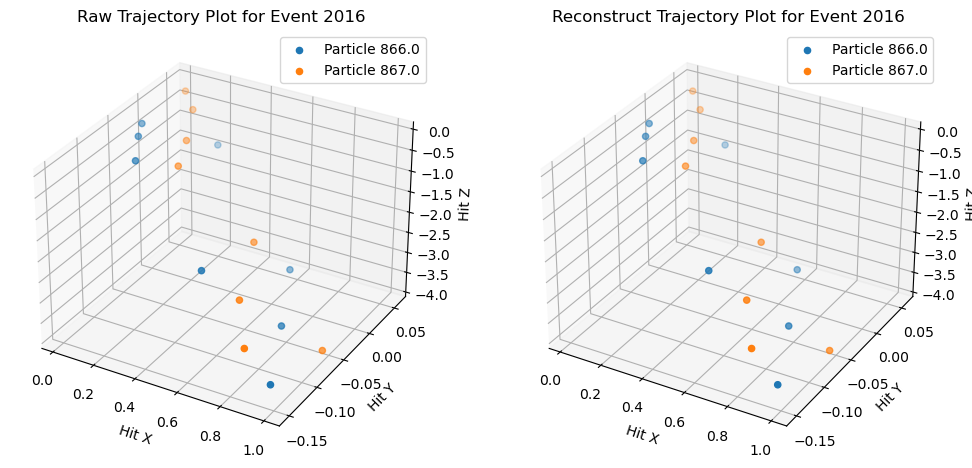

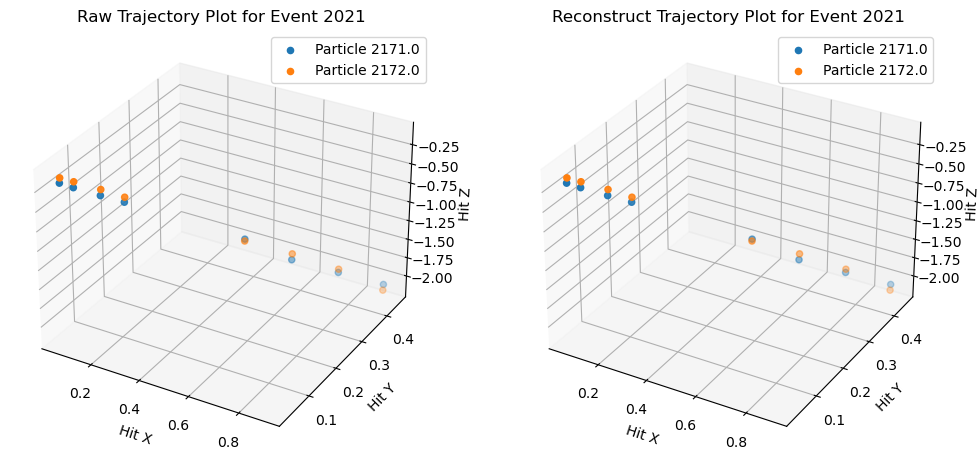

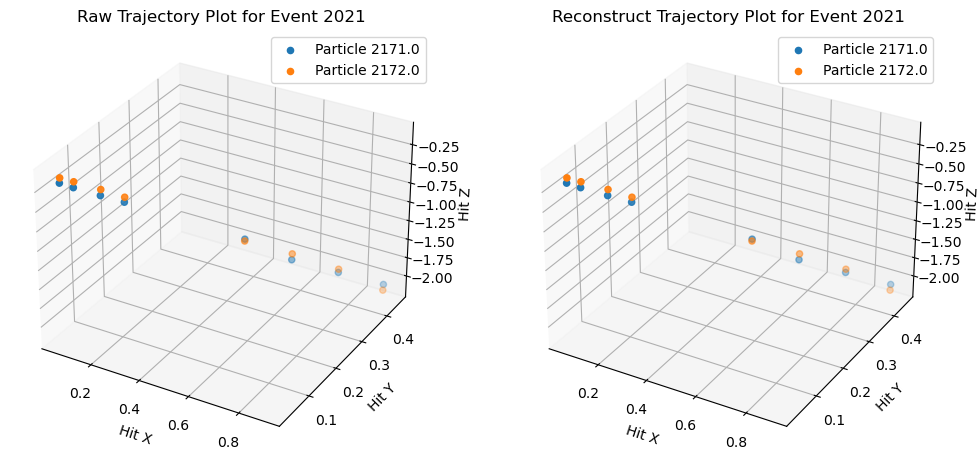

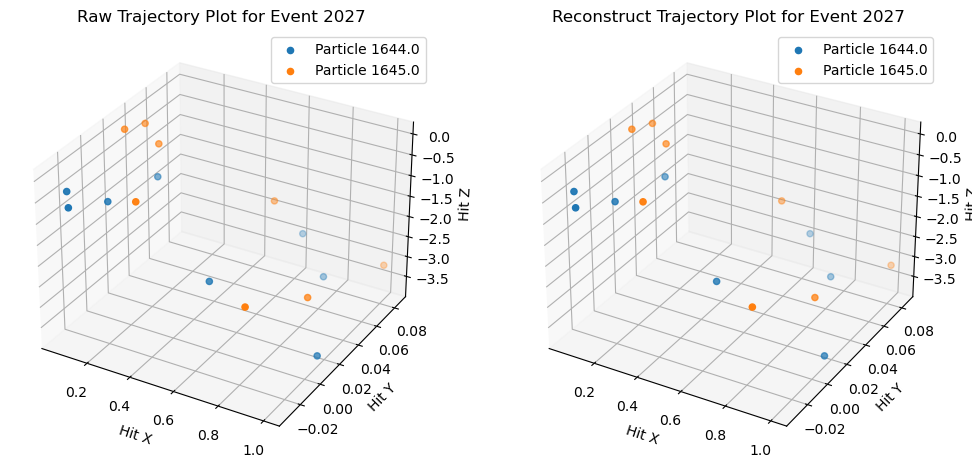

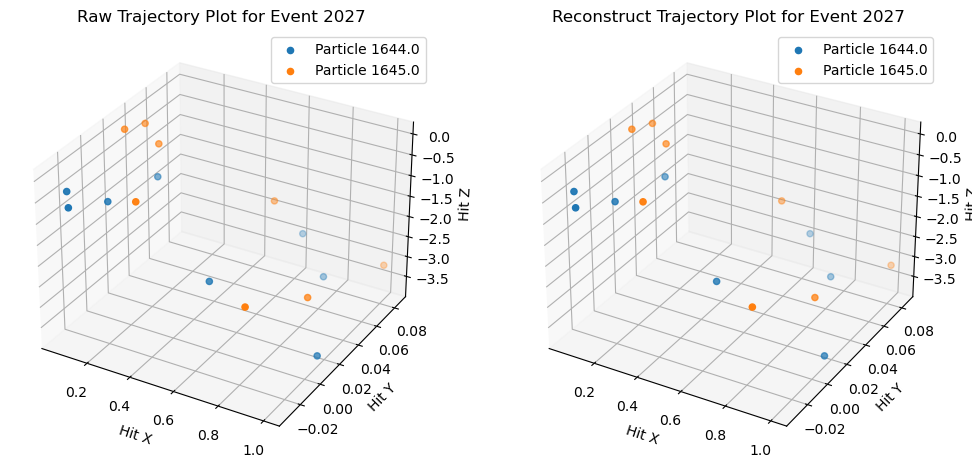

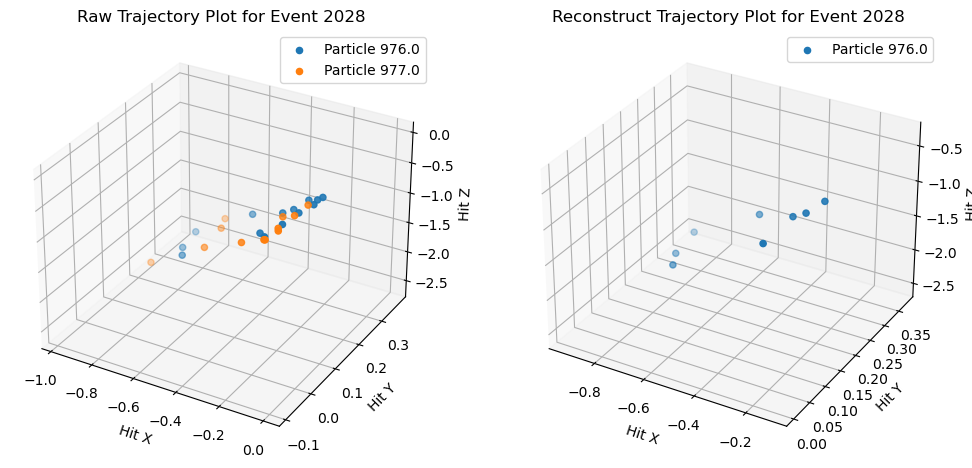

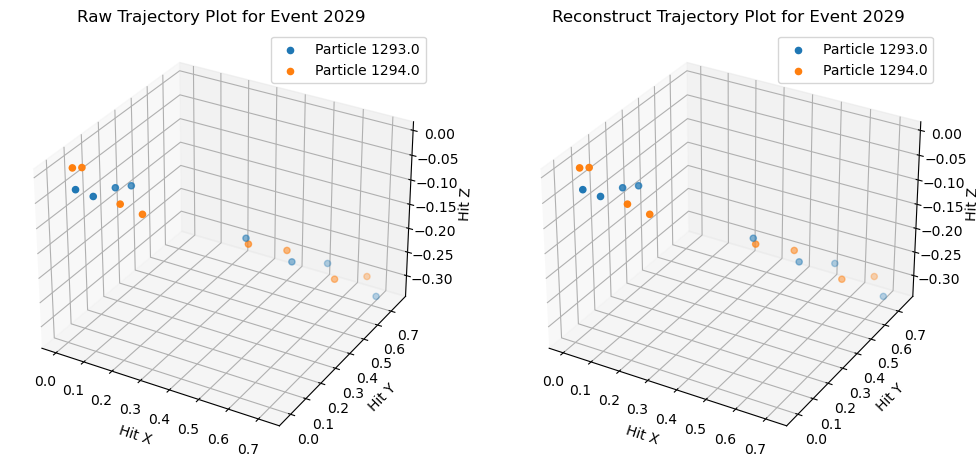

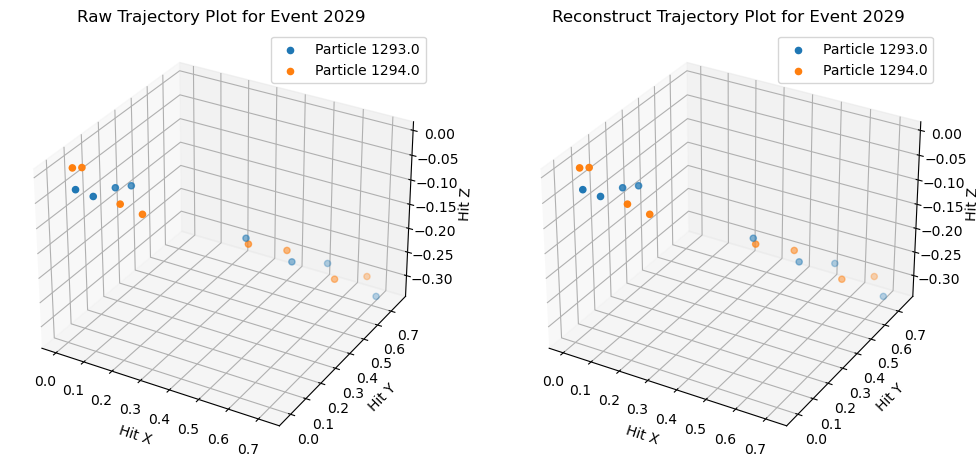

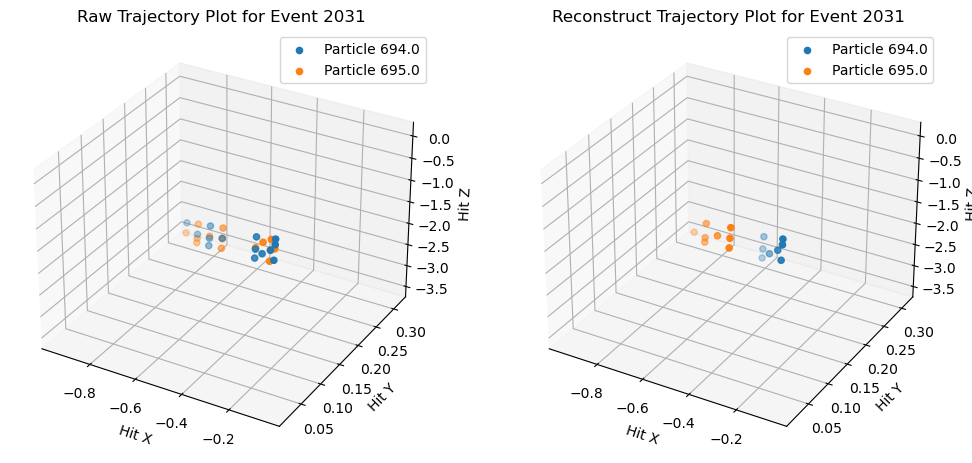

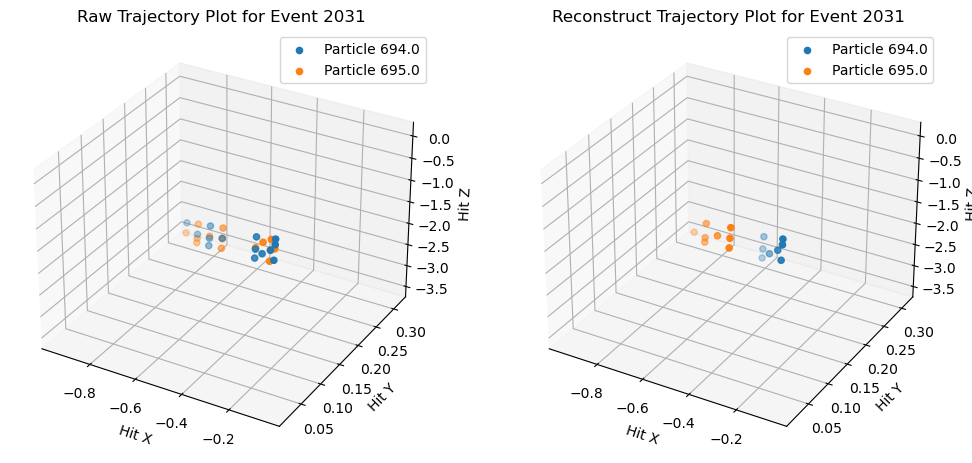

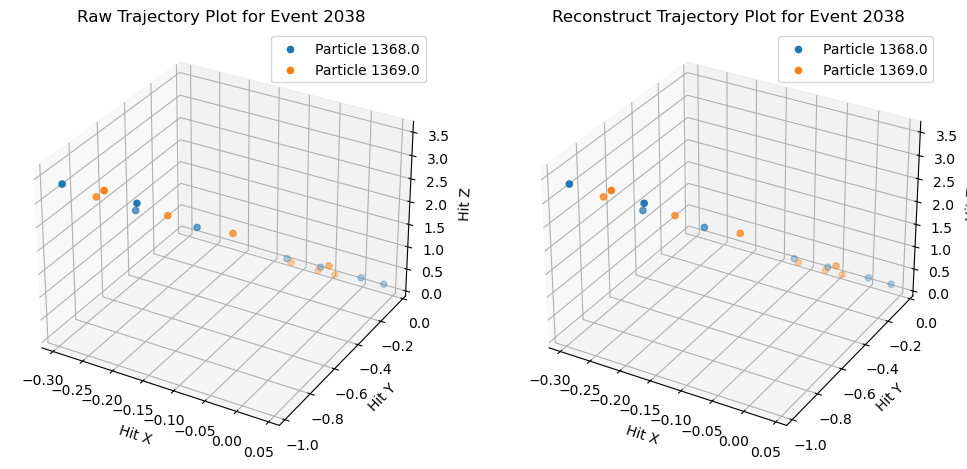

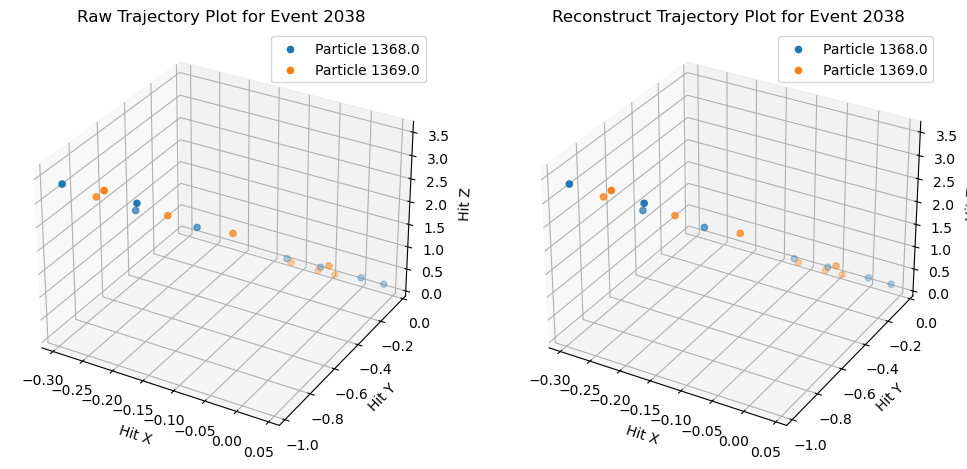

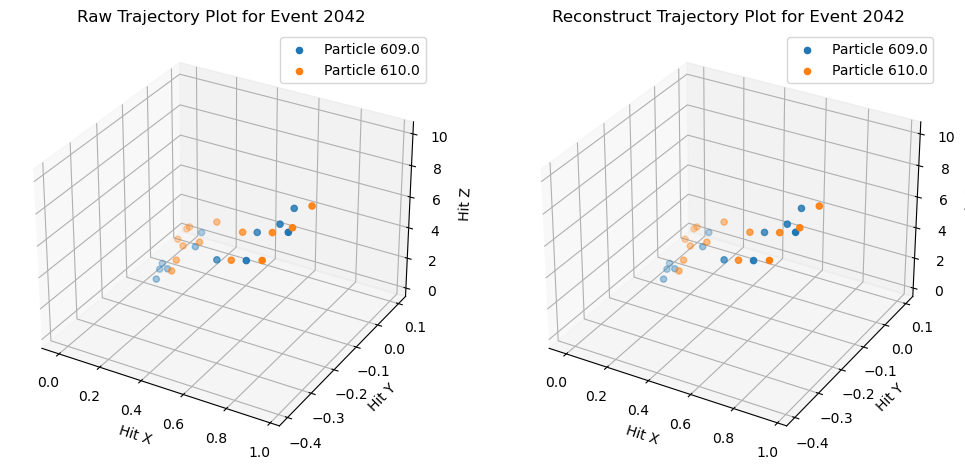

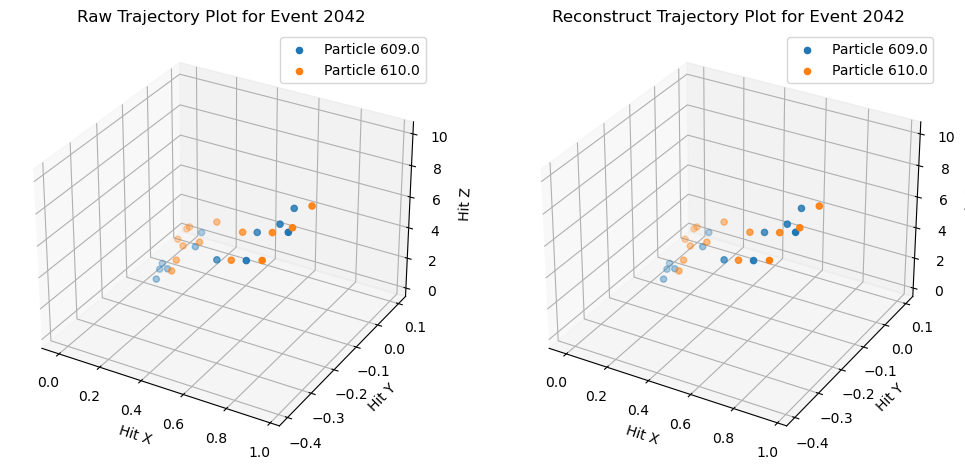

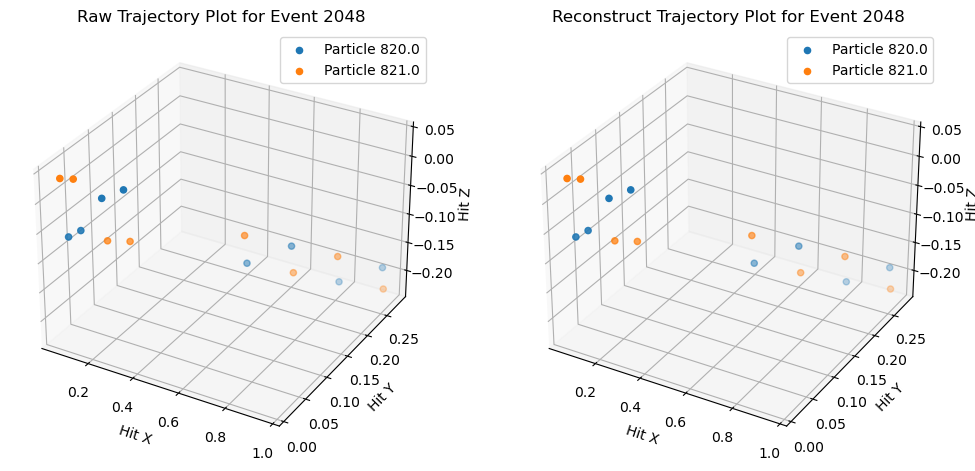

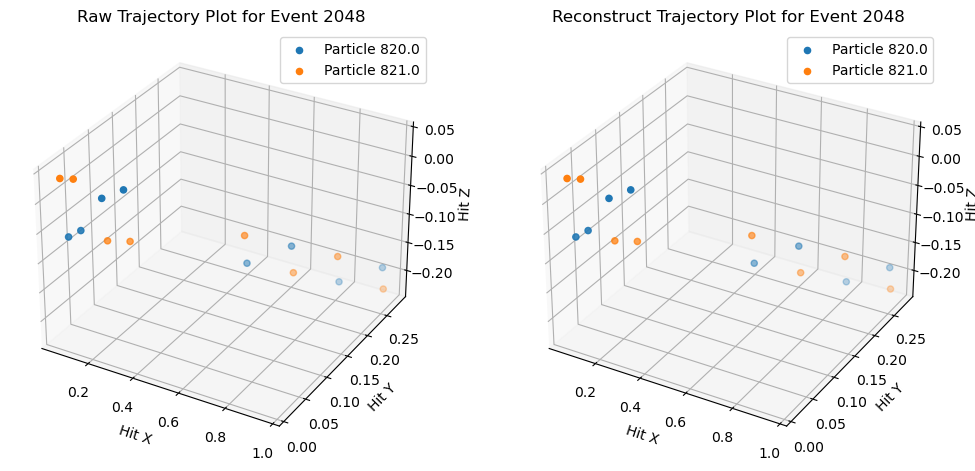

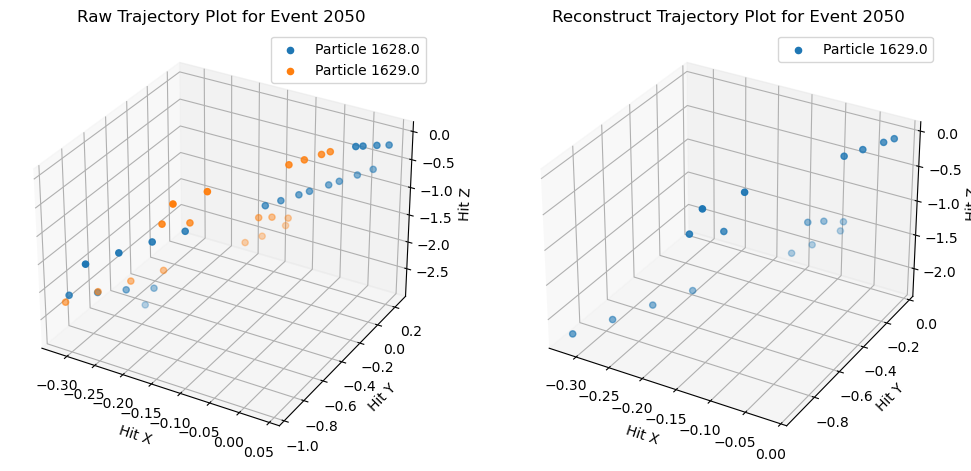

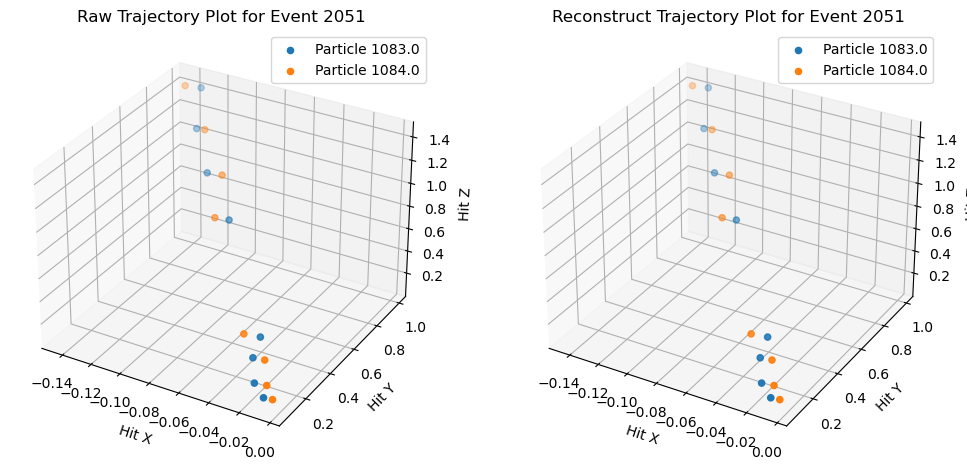

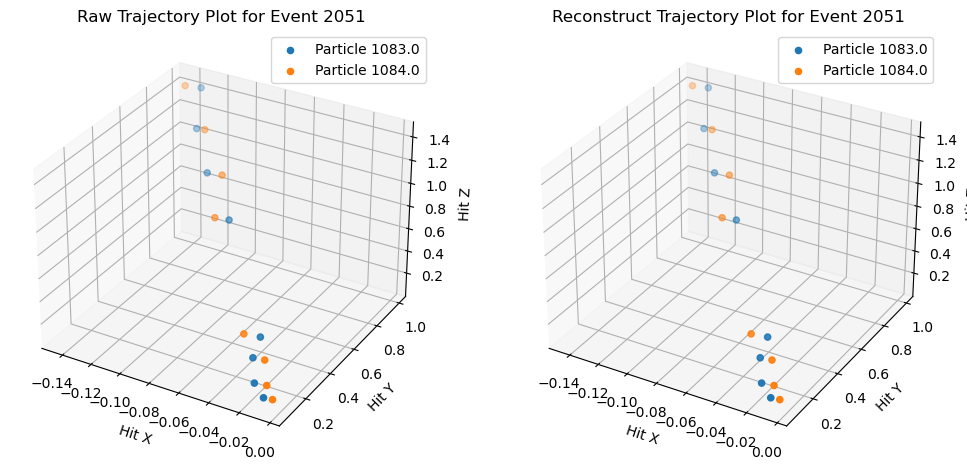

In [5]:
#Draw raw/reco plots

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
import os

output_directory = './plot/231011/quirk_nosel_2000_1400/compare_event_id_combine_point'
df_quirk = pd.read_csv('./output/quirk_nosel/track_quirk_sel_2000_1400.csv')
os.makedirs(output_directory, exist_ok=True)


def plot_event_trajectories(df, event_number, df_reconstruct):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    # Get unique particle_ids for the current event
    particle_ids = df['particle_id'].unique()

    for particle_id in particle_ids:
        # Plot the raw trajectory for each particle
        if particle_id in df['particle_id'].values:
            group = df[df['particle_id'] == particle_id]
            x = group['x']
            y = group['y']
            z = group['z']
            ax1.scatter(x, y, z, marker='o', label=f'Particle {particle_id}')
            #ax1.plot(x, y, z, marker='o', linestyle='-', label=f'Particle {particle_id}')

        # Plot the reconstructed trajectory for each particle
        if particle_id in df_reconstruct['particle_id'].values:
            group_reco = df_reconstruct[df_reconstruct['particle_id'] == particle_id]
            x_recon = group_reco['x']
            y_recon = group_reco['y']
            z_recon = group_reco['z']
            ax2.scatter(x_recon, y_recon, z_recon, marker='o', label=f'Particle {particle_id}')
            #ax2.plot(x_recon, y_recon, z_recon, marker='o', linestyle='-', label=f'Particle {particle_id}')

    ax1.set_xlabel('Hit X')
    ax1.set_ylabel('Hit Y')
    ax1.set_zlabel('Hit Z')
    ax1.set_title(f'Raw Trajectory Plot for Event {event_number}')
    ax1.legend()

    ax2.set_xlabel('Hit X')
    ax2.set_ylabel('Hit Y')
    ax2.set_zlabel('Hit Z')
    ax2.set_title(f'Reconstruct Trajectory Plot for Event {event_number}')
    ax2.legend()

    output_file_path = os.path.join(output_directory, f'E{event_number}_Trajectories.png')
    plt.savefig(output_file_path)

        
reconstruct_data = df_quirk.drop_duplicates(subset=['particle_id'])
event_file_array = reconstruct_data['event_id'].to_numpy()[:40]
# 循环处理每个 event_number
# Loop through each event and plot trajectories for both particles
for event_number in event_file_array:
    file_hit_name = f"../QuirkTracking/datasets/Lambda500_quirk/Quirk/event00000{event_number}-hits.csv"
    df = pd.read_csv(file_hit_name)
    df['r'] = (df['r']) / 51.4
    df['x'] = (df['r']) * np.cos(df['phi'])
    df['y'] = (df['r']) * np.sin(df['phi'])
    df['z'] = df['z'] / 100.

    # Read particle data and calculate the angle
    file_particle_name = f"../QuirkTracking/datasets/Lambda500_quirk/Quirk/event00000{event_number}-particles.csv"
    dfp = pd.read_csv(file_particle_name)
    #particle1 = dfp.iloc[0][['px', 'py', 'pz']]
    #particle2 = dfp.iloc[1][['px', 'py', 'pz']]
    #magnitude1 = np.linalg.norm(particle1)
    #magnitude2 = np.linalg.norm(particle2)
    #cosine_theta = np.dot(particle1, particle2) / (magnitude1 * magnitude2)
    #angle_radians = math.acos(cosine_theta)
    #angle_degrees = math.degrees(angle_radians)
    #print(f"The angle between two particles in Event {event_number}: degree: {angle_degrees}, rad: {angle_radians}")

    # Get reconstruction data for the current event
    df_reconstruct = df_quirk[df_quirk['event_id'] == event_number]

    # Plot trajectories for both particles in the event
    plot_event_trajectories(df, event_number, df_reconstruct)